In [1]:
import pandas as pd
import scipy
import numpy as np
import re
import time
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from surprise import SVD
from surprise import Dataset
from surprise import KNNWithMeans, Reader, Dataset
from surprise.model_selection import GridSearchCV

# COLLAB FILTERING USING KNN

In [2]:
# Load MovieLens data
ratings = pd.read_csv(r'ratings.csv')
movies = pd.read_csv(r'movies.csv')

# Join movies w/ their ratings
ratings = pd.merge(movies, ratings)

# Fill NA with 0
ratings['rating'] = ratings['rating'].fillna('0')

# Select only relevant fields
ratings_filtered = ratings[['userId', 'title', 'rating']]

ratings_filtered.head()

userId             title  rating
0       1  Toy Story (1995)     4.0
1       5  Toy Story (1995)     4.0
2       7  Toy Story (1995)     4.5
3      15  Toy Story (1995)     2.5
4      17  Toy Story (1995)     4.5

In [3]:
reader = Reader(rating_scale=(0, 5), line_format = 'user item rating')
gs_data = Dataset.load_from_df(ratings_filtered, reader)

In [4]:
# # Only run to optimize params again!

# # Params to optimize
# sim_options = {
#     "name": ["cosine", "pearson"],
#     "min_support": [1, 2, 3],
#     "user_based": [False, True]
# }
# #10, 20, 30
# param_grid = {
#     "k": [10, 20, 30],
#     "min_k": [1, 2, 3],
#     "sim_options": sim_options
# }

# # Run GridSearch to find best params w/ highest rmse
# gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=10)
# start = time.time()
# gs_res = gs.fit(gs_data)
# end = time.time()
# print ("Time elapsed:", end - start)

In [5]:
# # Only after optimizing params!
# print(gs.best_params["rmse"])
# print('rmse:', gs.best_score["rmse"])

In [6]:
# To use parms from GridSearchCV
sim_options = {
    "name": "pearson",
    "min_support": 3,
    "user_based": True
}

algo = KNNWithMeans(sim_options=sim_options, k=30, min_k=3)
predictions = algo.fit(gs_data.build_full_trainset())

pred_movies = []
for title in ratings['title']:
    pred = algo.predict(1, title)
    pred_movies.append(pred)

pred_analysis = pd.DataFrame(pred_movies).sort_values('est', ascending=False)[['iid', 'est']]
pred_analysis.drop_duplicates(subset=["iid"]).head(50)

Computing the pearson similarity matrix...
Done computing similarity matrix.


iid  est
26143                                  Goodfellas (1990)  5.0
25145  Raiders of the Lost Ark (Indiana Jones and the...  5.0
86839                            Funny Games U.S. (2007)  5.0
25236                                      Brazil (1985)  5.0
25383  Good, the Bad and the Ugly, The (Buono, il bru...  5.0
24995                         Princess Bride, The (1987)  5.0
86336                Futurama: Bender's Big Score (2007)  5.0
86507                         There Will Be Blood (2007)  5.0
24208        Wallace & Gromit: The Wrong Trousers (1993)  5.0
25754                              Apocalypse Now (1979)  5.0
25681                         Clockwork Orange, A (1971)  5.0
87814                                 Man on Wire (2008)  5.0
25853  Once Upon a Time in the West (C'era una volta ...  5.0
87712       It's the Great Pumpkin, Charlie Brown (1966)  5.0
87131                               Son of Rambow (2007)  5.0
25537                          Lawrence of Arabia (1962)  5.0
24808  Star Wars: Episode V - The Empire Strikes Back...  5.0
86016                                  Persepolis (2007)  5.0
8932                    Shawshank Redemption, The (1994)  5.0
8979                                Shallow Grave (1994)  5.0
24330                              Paths of Glory (1957)  5.0
24260     Cinema Paradiso (Nuovo cinema Paradiso) (1989)  5.0
85518                            Charlie Bartlett (2007)  5.0
85751                                3:10 to Yuma (2007)  5.0
85822           Tekkonkinkreet (Tekkon kinkurîto) (2006)  5.0
26876    Grand Day Out with Wallace and Gromit, A (1989)  5.0
27000                 Once Upon a Time in America (1984)  5.0
26855                           Full Metal Jacket (1987)  5.0
6535                                  Hoop Dreams (1994)  5.0
27001                                 Raging Bull (1980)  5.0
27068                                  Annie Hall (1977)  5.0
89336                             Drag Me to Hell (2009)  5.0
26677                     Godfather: Part II, The (1974)  5.0
88852                      Departures (Okuribito) (2008)  5.0
88669  5 Centimeters per Second (Byôsoku 5 senchimêto...  5.0
88700  Dear Zachary: A Letter to a Son About His Fath...  5.0
88870  Good, the Bad, the Weird, The (Joheunnom nabbe...  5.0
88962                           Sunshine Cleaning (2008)  5.0
27773               Bridge on the River Kwai, The (1957)  5.0
27756                   Femme Nikita, La (Nikita) (1990)  5.0
27721                               Touch of Evil (1958)  5.0
27859                                   Chinatown (1974)  5.0
27927                                   Duck Soup (1933)  5.0
27815                                  8 1/2 (8½) (1963)  5.0
90623  Girl Who Kicked the Hornet's Nest, The (Luftsl...  5.0
27161                       Boot, Das (Boat, The) (1981)  5.0
90338                              Ninja Assassin (2009)  5.0
27246                            Harold and Maude (1971)  5.0
27106                            Right Stuff, The (1983)  5.0
27530                           Miller's Crossing (1990)  5.0

In [7]:
# Use default params
sim_options = {
    "name": "pearson",
    "min_support": 1,
    "user_based": True
}

algo = KNNWithMeans(sim_options=sim_options)
predictions = algo.fit(gs_data.build_full_trainset())

pred_movies = []
for title in ratings['title']:
    pred = algo.predict(1, title)
    pred_movies.append(pred)

pred_analysis = pd.DataFrame(pred_movies).sort_values('est', ascending=False)[['iid', 'est']]
pred_analysis.drop_duplicates(subset=["iid"]).head(50)

Computing the pearson similarity matrix...
Done computing similarity matrix.


iid  est
27062                                  Annie Hall (1977)  5.0
25807                              Apocalypse Now (1979)  5.0
25597                         Clockwork Orange, A (1971)  5.0
78534     Facing Windows (Finestra di fronte, La) (2003)  5.0
78516  Last Life in the Universe (Ruang rak noi nid m...  5.0
78661                                     Slasher (2004)  5.0
78722                                        DiG! (2004)  5.0
78718                          Born into Brothels (2004)  5.0
78711  Tae Guk Gi: The Brotherhood of War (Taegukgi h...  5.0
78507   Green Butchers, The (Grønne slagtere, De) (2003)  5.0
78437                        Battlestar Galactica (2003)  5.0
78408  Happiness of the Katakuris, The (Katakuri-ke n...  5.0
78400        My Sassy Girl (Yeopgijeogin geunyeo) (2001)  5.0
78479  Battle Royale 2: Requiem (Batoru rowaiaru II: ...  5.0
78444                                       Oasis (2002)  5.0
26120                                  Goodfellas (1990)  5.0
79462         Wild Parrots of Telegraph Hill, The (2003)  5.0
79459                         Memories (Memorîzu) (1995)  5.0
25864  Once Upon a Time in the West (C'era una volta ...  5.0
78809        Gozu (Gokudô kyôfu dai-gekijô: Gozu) (2003)  5.0
79450  Pom Poko (a.k.a. Raccoon War, The) (Heisei tan...  5.0
79445       Sword of Doom, The (Dai-bosatsu tôge) (1966)  5.0
79442             League of Ordinary Gentlemen, A (2004)  5.0
79348                       Three Musketeers, The (1973)  5.0
79344                                 Dr. Giggles (1992)  5.0
79228                     Gorgeous (Boh lee chun) (1999)  5.0
79175   Rory O'Shea Was Here (Inside I'm Dancing) (2004)  5.0
79124         Memories of Murder (Salinui chueok) (2003)  5.0
79091                               Sergeant York (1941)  5.0
10520  Wonderful, Horrible Life of Leni Riefenstahl, ...  5.0
78922                            3-Iron (Bin-jip) (2004)  5.0
78377  Joint Security Area (Gongdong gyeongbi guyeok ...  5.0
78015               Hush... Hush, Sweet Charlotte (1964)  5.0
78008                          Harakiri (Seppuku) (1962)  5.0
78002                                  Pickpocket (1959)  5.0
77994  Young and the Damned, The (Olvidados, Los) (1950)  5.0
77990                          Unfaithfully Yours (1948)  5.0
77982                             Mr. Skeffington (1944)  5.0
77980                  Day of Wrath (Vredens dag) (1943)  5.0
77978                          Tales of Manhattan (1942)  5.0
77956                                Atalante, L' (1934)  5.0
77949      Andalusian Dog, An (Chien andalou, Un) (1929)  5.0
77945                         Steamboat Bill, Jr. (1928)  5.0
77938                                Control Room (2004)  5.0
78017                                     Onibaba (1964)  5.0
78019  Battle of Algiers, The (La battaglia di Algeri...  5.0
78279                                     Freaked (1993)  5.0
78277                                  Stand, The (1994)  5.0
78276                        Sonatine (Sonachine) (1993)  5.0
78270                               Bad Boy Bubby (1993)  5.0

In [8]:
# Get movie rec with a small pool of movie ratings
def get_rec_knn(movies):
    x = ratings_filtered.copy()

    for m in movies:
        x = x.append(pd.DataFrame([[9999, m[0], m[1]]], 
                                  columns=['userId', 'title', 'rating']), 
                     ignore_index=True)
    
    # To use parms from GridSearchCV
    sim_options = {
        "name": "pearson",
        "min_support": 1, # Changed 3 to 1 to account for small pool of movie ratings
        "user_based": False # With a small pool of ratings, item based is better
    }
    
    gs_data = Dataset.load_from_df(x, reader)

    algo = KNNWithMeans(sim_options=sim_options)
    predictions = algo.fit(gs_data.build_full_trainset())

    pred_movies = []
    for title in ratings['title']:
        if title in list(map(lambda n: n[0], movies)):
            continue
        pred = algo.predict(9999, title)
        pred_movies.append(pred)

    pred_analysis = pd.DataFrame(pred_movies).sort_values('est', ascending=False)[['iid', 'est']]
    display(pred_analysis.drop_duplicates(subset=["iid"]).head(50))

In [9]:
get_rec_knn([("Inception (2010)", 5), ("Avengers: Infinity War - Part I (2018)", 4), ("Lion King, The (1994)", 4), ("A Quiet Place (2018)", 4), ("Avatar (2009)", 5)])

C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\526593372.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(pd.DataFrame([[9999, m[0], m[1]]],
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\526593372.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(pd.DataFrame([[9999, m[0], m[1]]],
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\526593372.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(pd.DataFrame([[9999, m[0], m[1]]],
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\526593372.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(pd.DataFrame([[9999, m[0], m[1]]],
C:\U

Computing the pearson similarity matrix...
Done computing similarity matrix.


iid  est
20621                               Roman Holiday (1953)  5.0
27643                                  8 1/2 (8½) (1963)  5.0
95022                                Maniac Cop 2 (1990)  5.0
61969         Dr. Goldfoot and the Bikini Machine (1965)  5.0
39816                 1984 (Nineteen Eighty-Four) (1984)  5.0
95124                       Justice League: Doom (2012)   5.0
95176                     Bill Hicks: Revelations (1993)  5.0
27644                                   Chinatown (1974)  5.0
95012                    Escape from Planet Earth (2013)  5.0
94984                                Side Effects (2013)  5.0
95009                         Act of Killing, The (2012)  5.0
27528                               Graduate, The (1967)  5.0
5185                                         Kids (1995)  5.0
27549                               Touch of Evil (1958)  5.0
5211                           Living in Oblivion (1995)  5.0
94940                            English Vinglish (2012)  5.0
63199                                           O (2001)  5.0
62877                       War of the Roses, The (1989)  5.0
74530       Eternal Sunshine of the Spotless Mind (2004)  5.0
62312                     Dirty Rotten Scoundrels (1988)  5.0
86018                             Lions For Lambs (2007)  5.0
63217                             Wicker Man, The (1973)  5.0
62288                           Crossing Delancey (1988)  5.0
62203         Adventures of Baron Munchausen, The (1988)  5.0
62179                                        More (1998)  5.0
13539                                       Naked (1993)  5.0
27367                           Miller's Crossing (1990)  5.0
95707                                    Nebraska (2013)  5.0
60046                           Empire of the Sun (1987)  5.0
85650           Tekkonkinkreet (Tekkon kinkurîto) (2006)  5.0
14180                 Searching for Bobby Fischer (1993)  5.0
27347                                   Manhattan (1979)  5.0
95521                                      2 Guns (2013)  5.0
85780                                      Sleuth (2007)  5.0
95532                       Louis C.K.: Oh My God (2013)  5.0
60089                           Hollywood Shuffle (1987)  5.0
85844                                  Persepolis (2007)  5.0
95477            Craig Ferguson: I'm Here To Help (2013)  5.0
95618                                 You're Next (2011)  5.0
40379                             Rosemary's Baby (1968)  5.0
60344                         Reform School Girls (1986)  5.0
60192      In the Mood For Love (Fa yeung nin wa) (2000)  5.0
60168                          Monster Squad, The (1987)  5.0
95622  Mystery of the Third Planet, The (Tayna tretey...  5.0
3693                                  Taxi Driver (1976)  5.0
38299                          Dangerous Liaisons (1988)  5.0
94212                                 Geri's Game (1997)  5.0
38394                                      Lolita (1997)  5.0
94233                             Goodbye Charlie (1964)  5.0
86417      Like Stars on Earth (Taare Zameen Par) (2007)  5.0

# USER-ITEM Collaborative Filtering Recommendation System USING SIMILARITY SEARCH

Preprocessing of netflix and movielen datasets (With their own respective users' ratings)

In [10]:
ratings = pd.read_csv("userDatas.csv")
netflixData = pd.read_csv("netflix_titles.csv")
ratings = ratings.merge(netflixData)

movieLen = pd.read_csv("movies.csv")
mRatings = pd.read_csv("ratings.csv")
mRatings = mRatings.merge(movieLen)
mRatings

userId  movieId  rating   timestamp                             title  \
0            1        1     4.0   964982703                  Toy Story (1995)   
1            5        1     4.0   847434962                  Toy Story (1995)   
2            7        1     4.5  1106635946                  Toy Story (1995)   
3           15        1     2.5  1510577970                  Toy Story (1995)   
4           17        1     4.5  1305696483                  Toy Story (1995)   
...        ...      ...     ...         ...                               ...   
100831     610   160341     2.5  1479545749                  Bloodmoon (1997)   
100832     610   160527     4.5  1479544998  Sympathy for the Underdog (1971)   
100833     610   160836     3.0  1493844794                     Hazard (2005)   
100834     610   163937     3.5  1493848789                Blair Witch (2016)   
100835     610   163981     3.5  1493850155                         31 (2016)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1       Adventure|Animation|Children|Comedy|Fantasy  
2       Adventure|Animation|Children|Comedy|Fantasy  
3       Adventure|Animation|Children|Comedy|Fantasy  
4       Adventure|Animation|Children|Comedy|Fantasy  
...                                             ...  
100831                              Action|Thriller  
100832                           Action|Crime|Drama  
100833                        Action|Drama|Thriller  
100834                              Horror|Thriller  
100835                                       Horror  

[100836 rows x 6 columns]

In [11]:
ratings['cast'] = ratings['cast'].fillna(' ')
ratings['fav_cast'] = ratings['fav_cast'].fillna(' ')
ratings['director'] = ratings['director'].fillna(' ')
ratings['country'] = ratings['country'].fillna(' ')

ratings.head(61)

user_id                           fav_genre show_id  \
0       u1  Action & Adventure,Scifi & Fantasy    s144   
1       u1  Action & Adventure,Scifi & Fantasy   s6201   
2       u3                  Action & Adventure   s6201   
3       u1  Action & Adventure,Scifi & Fantasy   s8068   
4       u1  Action & Adventure,Scifi & Fantasy   s8069   
..     ...                                 ...     ...   
56     u10                              Dramas    s113   
57     u10                              Dramas   s1090   
58     u10                              Dramas   s1485   
59     u10                              Dramas   s1436   
60     u10                              Dramas   s1768   

                                             fav_cast  user_rating   type  \
0                          Tobey Maguire,James Franco            3  Movie   
1                          Tobey Maguire,James Franco            5  Movie   
2   Chris Hemsworth,Rain,Matt Damon,Jason Statham,...            5  Movie   
3                          Tobey Maguire,James Franco            4  Movie   
4                          Tobey Maguire,James Franco            5  Movie   
..                                                ...          ...    ...   
56          Naomi Watts,Miachel Keaton,Zaria,Amy Ryan            5  Movie   
57          Naomi Watts,Miachel Keaton,Zaria,Amy Ryan            3  Movie   
58          Naomi Watts,Miachel Keaton,Zaria,Amy Ryan            2  Movie   
59          Naomi Watts,Miachel Keaton,Zaria,Amy Ryan            5  Movie   
60          Naomi Watts,Miachel Keaton,Zaria,Amy Ryan            4  Movie   

                                title  \
0                       Green Lantern   
1              Avengers: Infinity War   
2              Avengers: Infinity War   
3                        Spider-Man 3   
4   Spider-Man: Into the Spider-Verse   
..                                ...   
56                              Worth   
57              Two Distant Strangers   
58                   Cops and Robbers   
59                  Pieces of a Woman   
60                     The Impossible   

                                         director  \
0                                 Martin Campbell   
1                        Anthony Russo, Joe Russo   
2                        Anthony Russo, Joe Russo   
3                                       Sam Raimi   
4   Peter Ramsey, Rodney Rothman, Bob Persichetti   
..                                            ...   
56                                 Sara Colangelo   
57                Travon Free, Martin Desmond Roe   
58                 Arnon Manor, Timothy Ware-Hill   
59                               Kornél Mundruczó   
60                                    J.A. Bayona   

                                                 cast  \
0   Ryan Reynolds, Blake Lively, Peter Sarsgaard, ...   
1   Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...   
2   Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...   
3   Tobey Maguire, Kirsten Dunst, James Franco, Th...   
4   Shameik Moore, Jake Johnson, Hailee Steinfeld,...   
..                                                ...   
56  Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...   
57                  Joey Bada$$, Andrew Howard, Zaria   
58                                  Timothy Ware-Hill   
59  Vanessa Kirby, Shia LaBeouf, Ellen Burstyn, Mo...   
60  Naomi Watts, Ewan McGregor, Tom Holland, Samue...   

                           country         date_added  release_year rating  \
0                    United States  September 1, 2021          2011  PG-13   
1                    United States  December 25, 2018          2018  PG-13   
2                    United States  December 25, 2018          2018  PG-13   
3                    United States   November 1, 2019          2007  PG-13   
4                    United States      June 26, 2019          2018     PG   
..                             ...                ...           ...    ...   
56                  

In [12]:
mRatings = mRatings[['userId', 'movieId', 'rating', 'title', 'genres']]
mRatings

userId  movieId  rating                             title  \
0            1        1     4.0                  Toy Story (1995)   
1            5        1     4.0                  Toy Story (1995)   
2            7        1     4.5                  Toy Story (1995)   
3           15        1     2.5                  Toy Story (1995)   
4           17        1     4.5                  Toy Story (1995)   
...        ...      ...     ...                               ...   
100831     610   160341     2.5                  Bloodmoon (1997)   
100832     610   160527     4.5  Sympathy for the Underdog (1971)   
100833     610   160836     3.0                     Hazard (2005)   
100834     610   163937     3.5                Blair Witch (2016)   
100835     610   163981     3.5                         31 (2016)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1       Adventure|Animation|Children|Comedy|Fantasy  
2       Adventure|Animation|Children|Comedy|Fantasy  
3       Adventure|Animation|Children|Comedy|Fantasy  
4       Adventure|Animation|Children|Comedy|Fantasy  
...                                             ...  
100831                              Action|Thriller  
100832                           Action|Crime|Drama  
100833                        Action|Drama|Thriller  
100834                              Horror|Thriller  
100835                                       Horror  

[100836 rows x 5 columns]

#### Create a table that shows user's rating of different show/movie titles

Netflix User ratings

In [13]:
userRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='user_rating')
print("Before: ",userRatings.shape)
userRatings.fillna(0, inplace=True)
print("After: ",userRatings.shape)
userRatings.head(10)

Before:  (10, 58)
After:  (10, 58)


title    60 Days In  Akame ga Kill!  Attack on Titan  Avengers: Infinity War  \
user_id                                                                        
u1              0.0             0.0              0.0                     5.0   
u10             0.0             0.0              0.0                     0.0   
u2              0.0             0.0              0.0                     0.0   
u3              0.0             0.0              0.0                     5.0   
u4              0.0             2.0              4.0                     0.0   
u5              0.0             0.0              0.0                     0.0   
u6              0.0             0.0              0.0                     0.0   
u7              0.0             0.0              0.0                     0.0   
u8              2.0             0.0              0.0                     0.0   
u9              0.0             0.0              0.0                     0.0   

title    Blade Runner: The Final Cut  Bling Empire  \
user_id                                              
u1                               0.0           0.0   
u10                              0.0           0.0   
u2                               0.0           0.0   
u3                               0.0           0.0   
u4                               0.0           0.0   
u5                               0.0           0.0   
u6                               0.0           0.0   
u7                               2.0           0.0   
u8                               0.0           3.0   
u9                               0.0           0.0   

title    Bob Ross: Happy Accidents, Betrayal & Greed  Cops and Robbers  \
user_id                                                                  
u1                                               0.0               0.0   
u10                                              0.0               2.0   
u2                                               0.0               0.0   
u3                                               0.0               0.0   
u4                                               0.0               0.0   
u5                                               4.0               0.0   
u6                                               0.0               0.0   
u7                                               0.0               0.0   
u8                                               0.0               0.0   
u9                                               0.0               0.0   

title    Cosmic Sin  Creating an Army of the Dead  ...  The Kissing Booth 3  \
user_id                                            ...                        
u1              0.0                           0.0  ...                  0.0   
u10             0.0                           0.0  ...                  0.0   
u2              0.0                           0.0  ...                  0.0   
u3              4.0                           0.0  ...                  0.0   
u4              0.0                           0.0  ...                  0.0   
u5              0.0                           3.0  ...                  0.0   
u6              0.0                           0.0  ...                  0.0   
u7              0.0                           0.0  ...                  0.0   
u8              0.0                           0.0  ...                  0.0   
u9              0.0                           0.0  ...                  4.0   

title    The Secret Life of Pets 2  The Seven Deadly Sins  The Seventh Day  \
user_id                                                                      
u1                             0.0                    0.0              0.0   
u10                            0.0                    0.0              0.0   
u2                             3.0                    0.0              0.0   
u3                             0.0                    0.0              0.0   
u4                             0.0                    3.0              0.0   
u5    

MovieLen User Ratings

In [14]:
userMRatings = mRatings.pivot_table(index=['userId'], columns=['title'], values='rating')
userMRatings.fillna(0, inplace=True)
userMRatings.head(10)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              0.0                                      0.0   
2              0.0                                      0.0   
3              0.0                                      0.0   
4              0.0                                      0.0   
5              0.0                                      0.0   
6              0.0                                      0.0   
7              0.0                                      0.0   
8              0.0                                      0.0   
9              0.0                                      0.0   
10             0.0                                      0.0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   
5                          0.0                  0.0   
6                          0.0                  0.0   
7                          0.0                  0.0   
8                          0.0                  0.0   
9                          0.0                  0.0   
10                         0.0                  0.0   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             0.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   
5                             0.0                              0.0   
6                             0.0                              0.0   
7                             0.0                              0.0   
8                             0.0                              0.0   
9                             0.0                              0.0   
10                            0.0                              0.0   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
1                      0.0                   0.0                          0.0   
2                      0.0                   0.0                          0.0   
3                      0.0                   0.0                          0.0   
4                      0.0                   0.0                          0.0   
5                      0.0                   0.0                          0.0   
6                      0.0                   0.0                          0.0   
7                      0.0                   0.0                          0.0   
8                      0.0                   0.0                          0.0   
9                      0.0                   0.0                          0.0   
10                     0.0                   0.0                          0.0   

title   *batteries not included (1987)  ...  Zulu (2013)  [REC] (2007)  \
userId                                  ...                              
1                                  0.0  ...          0.0           0.0   
2                                  0.0  ...          0.0           0.0   
3                                  0.0  ...          0.0           0.0   
4                                  0.0  ...          0.0           0.0   
5                                  0.0  ...          0.0           0.0   
6                                  0.0  ...          0.0           0.0   
7                                  0.0  ...          0.0           0.0   
8                                  0.0  ...          0.0           0.0   
9                           

Movie/show Correlation data using pearson correlations

### Netflix data Correlation

In [15]:
corrMatrix = userRatings.corr(method='pearson')
corrMatrix.head(10)

title                                        60 Days In  Akame ga Kill!  \
title                                                                     
60 Days In                                     1.000000       -0.111111   
Akame ga Kill!                                -0.111111        1.000000   
Attack on Titan                               -0.111111        1.000000   
Avengers: Infinity War                        -0.166667       -0.166667   
Blade Runner: The Final Cut                   -0.111111       -0.111111   
Bling Empire                                   1.000000       -0.111111   
Bob Ross: Happy Accidents, Betrayal & Greed   -0.111111       -0.111111   
Cops and Robbers                              -0.111111       -0.111111   
Cosmic Sin                                    -0.111111       -0.111111   
Creating an Army of the Dead                  -0.111111       -0.111111   

title                                        Attack on Titan  \
title                                                          
60 Days In                                         -0.111111   
Akame ga Kill!                                      1.000000   
Attack on Titan                                     1.000000   
Avengers: Infinity War                             -0.166667   
Blade Runner: The Final Cut                        -0.111111   
Bling Empire                                       -0.111111   
Bob Ross: Happy Accidents, Betrayal & Greed        -0.111111   
Cops and Robbers                                   -0.111111   
Cosmic Sin                                         -0.111111   
Creating an Army of the Dead                       -0.111111   

title                                        Avengers: Infinity War  \
title                                                                 
60 Days In                                                -0.166667   
Akame ga Kill!                                            -0.166667   
Attack on Titan                                           -0.166667   
Avengers: Infinity War                                     1.000000   
Blade Runner: The Final Cut                               -0.166667   
Bling Empire                                              -0.166667   
Bob Ross: Happy Accidents, Betrayal & Greed               -0.166667   
Cops and Robbers                                          -0.166667   
Cosmic Sin                                                 0.666667   
Creating an Army of the Dead                              -0.166667   

title                                        Blade Runner: The Final Cut  \
title                                                                      
60 Days In                                                     -0.111111   
Akame ga Kill!                                                 -0.111111   
Attack on Titan                                                -0.111111   
Avengers: Infinity War                                         -0.166667   
Blade Runner: The Final Cut                                     1.000000   
Bling Empire                                                   -0.111111   
Bob Ross: Happy Accidents, Betrayal & Greed                    -0.111111   
Cops and Robbers                                               -0.111111   
Cosmic Sin                                                     -0.111111   
Creating an Army of the Dead                                   -0.111111   

title                                        Bling Empire  \
title                                                       
60 Days In                                       1.000000   
Akame ga Kill!                                  -0.111111   
Attack on Titan                                 -0.111111   
Avengers: Infinity War                          -0.166667   
Blade Runner: The Final Cut                     -0.111111   
Bling Empire                                     1.000000   
Bob Ross: Happy Accidents, Betrayal & Greed     -0.111111   
Cops and Robber

Netflix Pearson Correlation HeatMap

<AxesSubplot: xlabel='title', ylabel='title'>

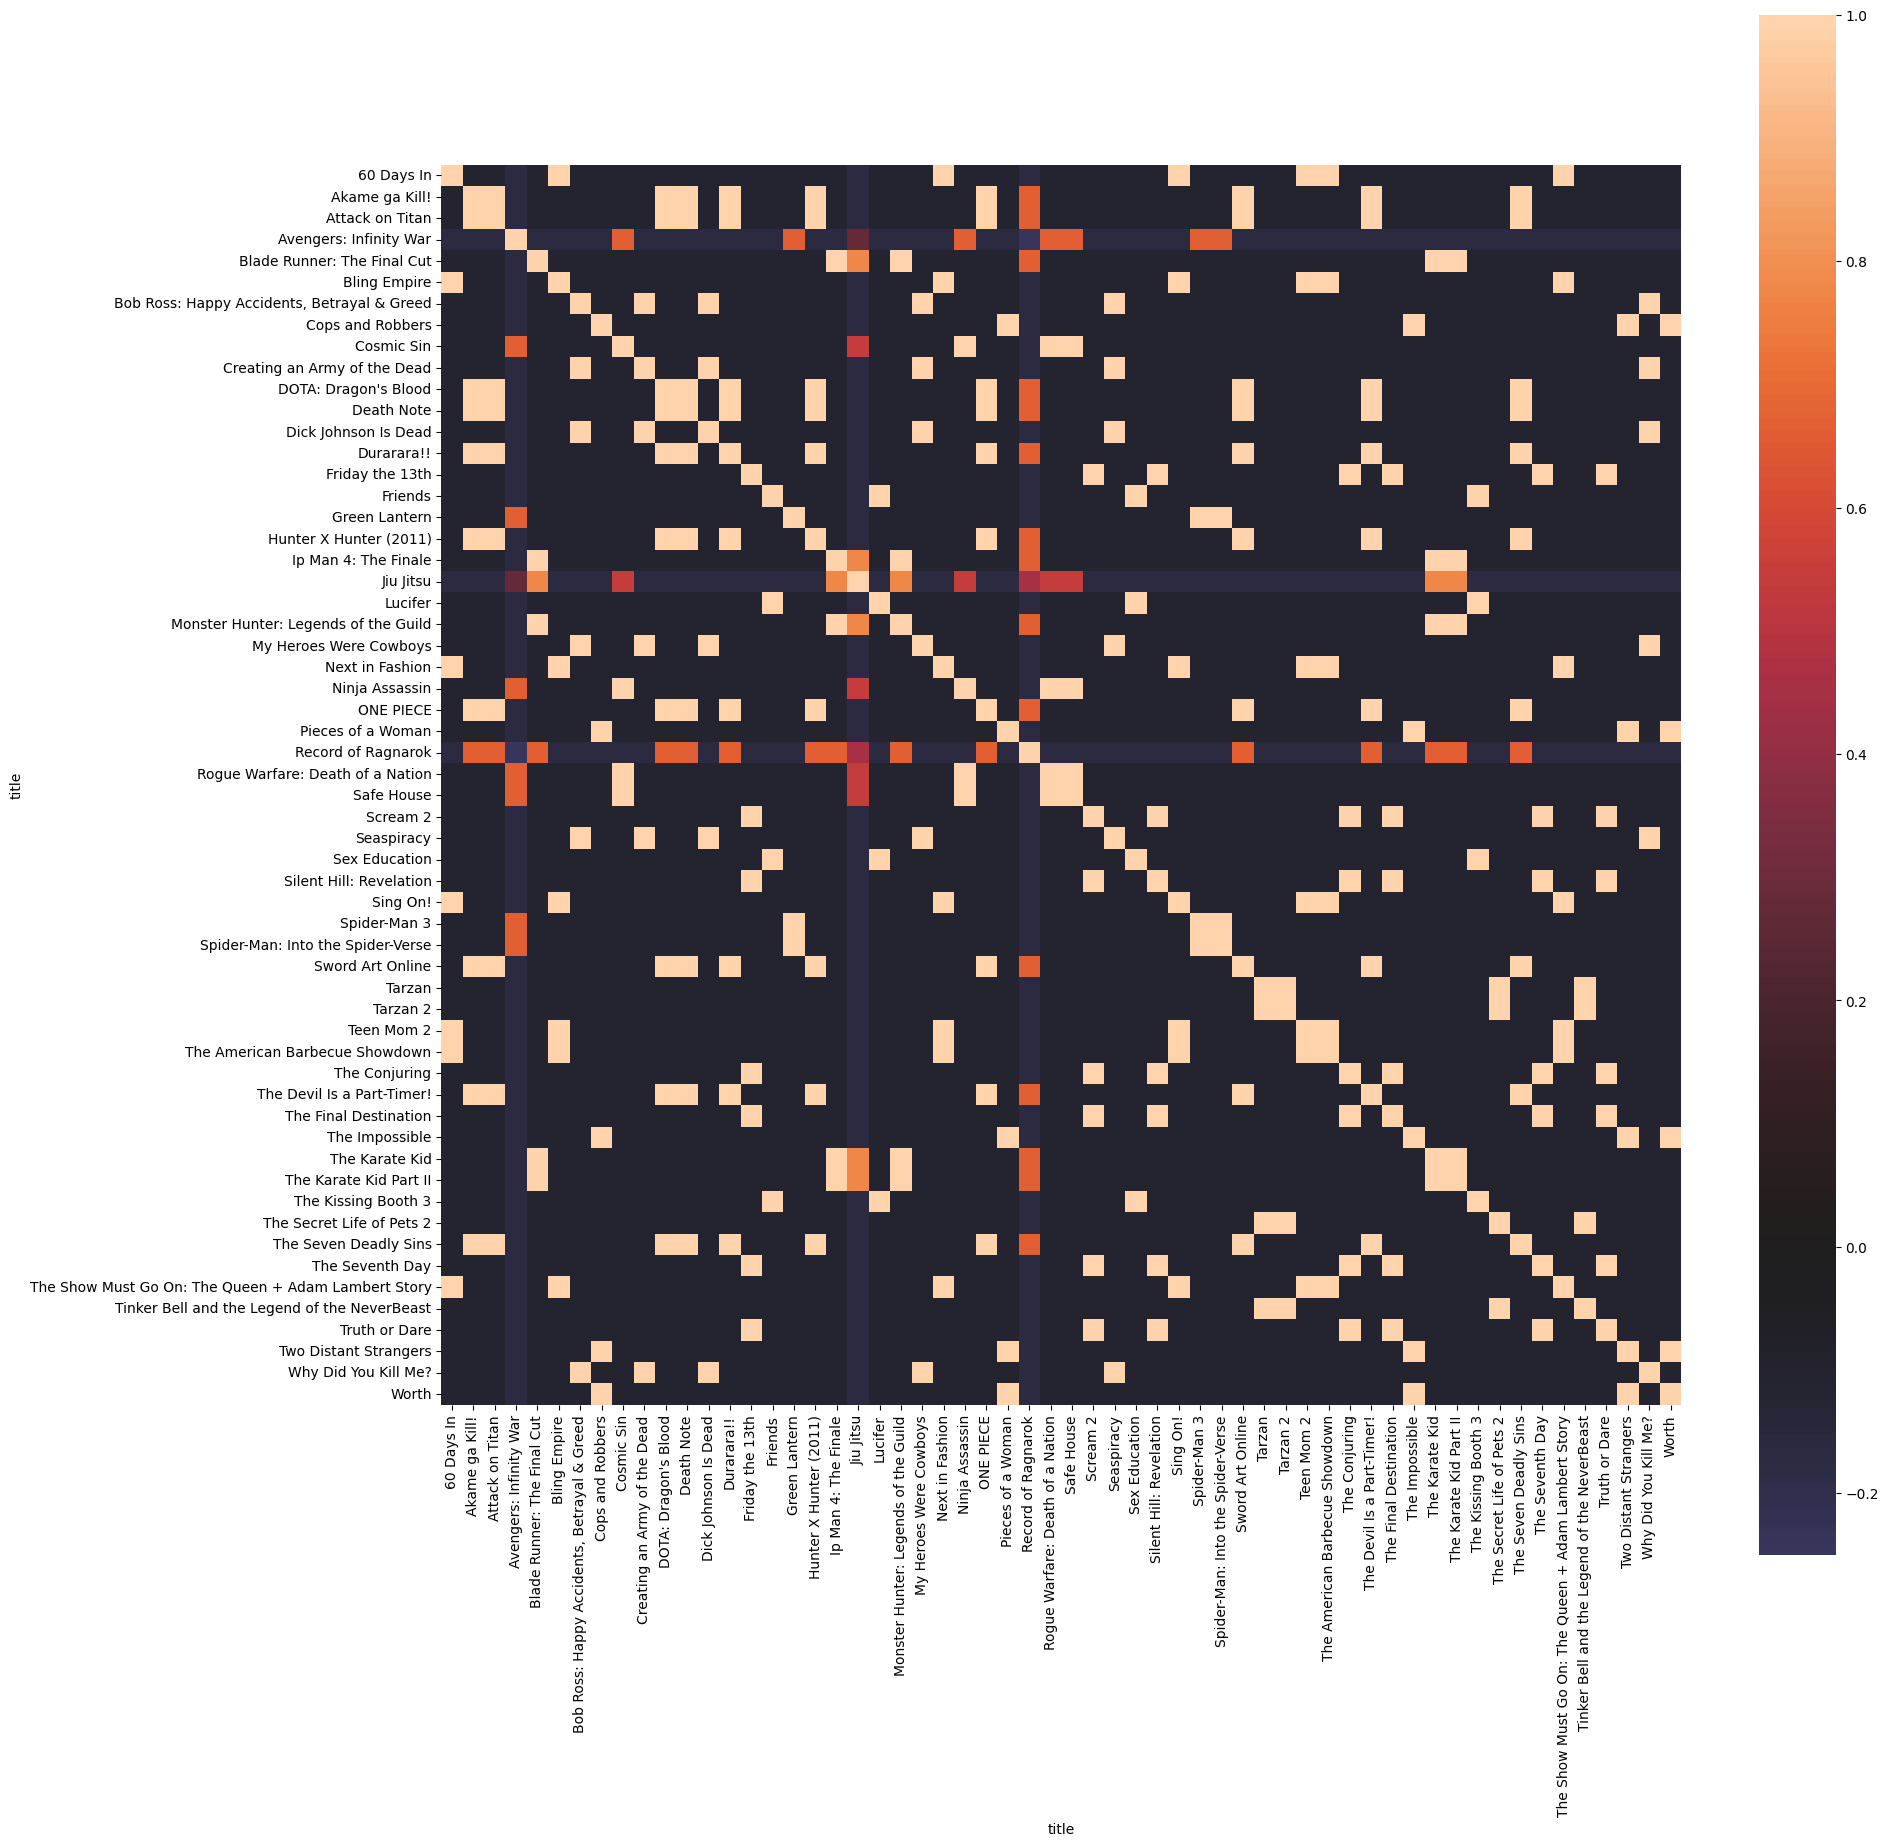

In [ ]:
f, ax  =plt.subplots(figsize = (20,20))
sns.heatmap(corrMatrix, square = True, center = 0, annot = False)

### MovieLen data correlation

In [16]:
corrMMatrix = userMRatings.corr(method='pearson')
corrMMatrix.head(10)

title                                    '71 (2014)  \
title                                                 
'71 (2014)                                 1.000000   
'Hellboy': The Seeds of Creation (2004)   -0.001642   
'Round Midnight (1986)                    -0.002324   
'Salem's Lot (2004)                       -0.001642   
'Til There Was You (1997)                 -0.002254   
'Tis the Season for Love (2015)           -0.001642   
'burbs, The (1989)                        -0.006407   
'night Mother (1986)                      -0.001642   
(500) Days of Summer (2009)                0.135943   
*batteries not included (1987)            -0.004325   

title                                    'Hellboy': The Seeds of Creation (2004)  \
title                                                                              
'71 (2014)                                                             -0.001642   
'Hellboy': The Seeds of Creation (2004)                                 1.000000   
'Round Midnight (1986)                                                  0.706526   
'Salem's Lot (2004)                                                    -0.001642   
'Til There Was You (1997)                                              -0.002254   
'Tis the Season for Love (2015)                                        -0.001642   
'burbs, The (1989)                                                     -0.006407   
'night Mother (1986)                                                   -0.001642   
(500) Days of Summer (2009)                                            -0.010568   
*batteries not included (1987)                                         -0.004325   

title                                    'Round Midnight (1986)  \
title                                                             
'71 (2014)                                            -0.002324   
'Hellboy': The Seeds of Creation (2004)                0.706526   
'Round Midnight (1986)                                 1.000000   
'Salem's Lot (2004)                                   -0.002324   
'Til There Was You (1997)                             -0.003191   
'Tis the Season for Love (2015)                       -0.002324   
'burbs, The (1989)                                     0.170199   
'night Mother (1986)                                  -0.002324   
(500) Days of Summer (2009)                           -0.014958   
*batteries not included (1987)                        -0.006121   

title                                    'Salem's Lot (2004)  \
title                                                          
'71 (2014)                                         -0.001642   
'Hellboy': The Seeds of Creation (2004)            -0.001642   
'Round Midnight (1986)                             -0.002324   
'Salem's Lot (2004)                                 1.000000   
'Til There Was You (1997)                           0.857269   
'Tis the Season for Love (2015)                    -0.001642   
'burbs, The (1989)                                 -0.006407   
'night Mother (1986)                               -0.001642   
(500) Days of Summer (2009)                        -0.010568   
*batteries not included (1987)                     -0.004325   

title                                    'Til There Was You (1997)  \
title                                                                
'71 (2014)                                               -0.002254   
'Hellboy': The Seeds of Creation (2004)                  -0.002254   
'Round Midnight (1986)                                   -0.003191   
'Salem's Lot (2004)                                       0.857269   
'Til There Was You (1997)                                 1.000000   
'Tis the Season for Love (2015)                          -0.002254   
'burbs, The (1989)                                       -0.008797   
'night Mother (1986)                                     -0.002254   
(500) Days of Summer (2009)                             

In [17]:
newCorrMMatrix = corrMMatrix.iloc[0:75,0:75]


Due to the large size in the data, sample size of 75 movies were taken to display the correlation on the heatmap

<AxesSubplot: xlabel='title', ylabel='title'>

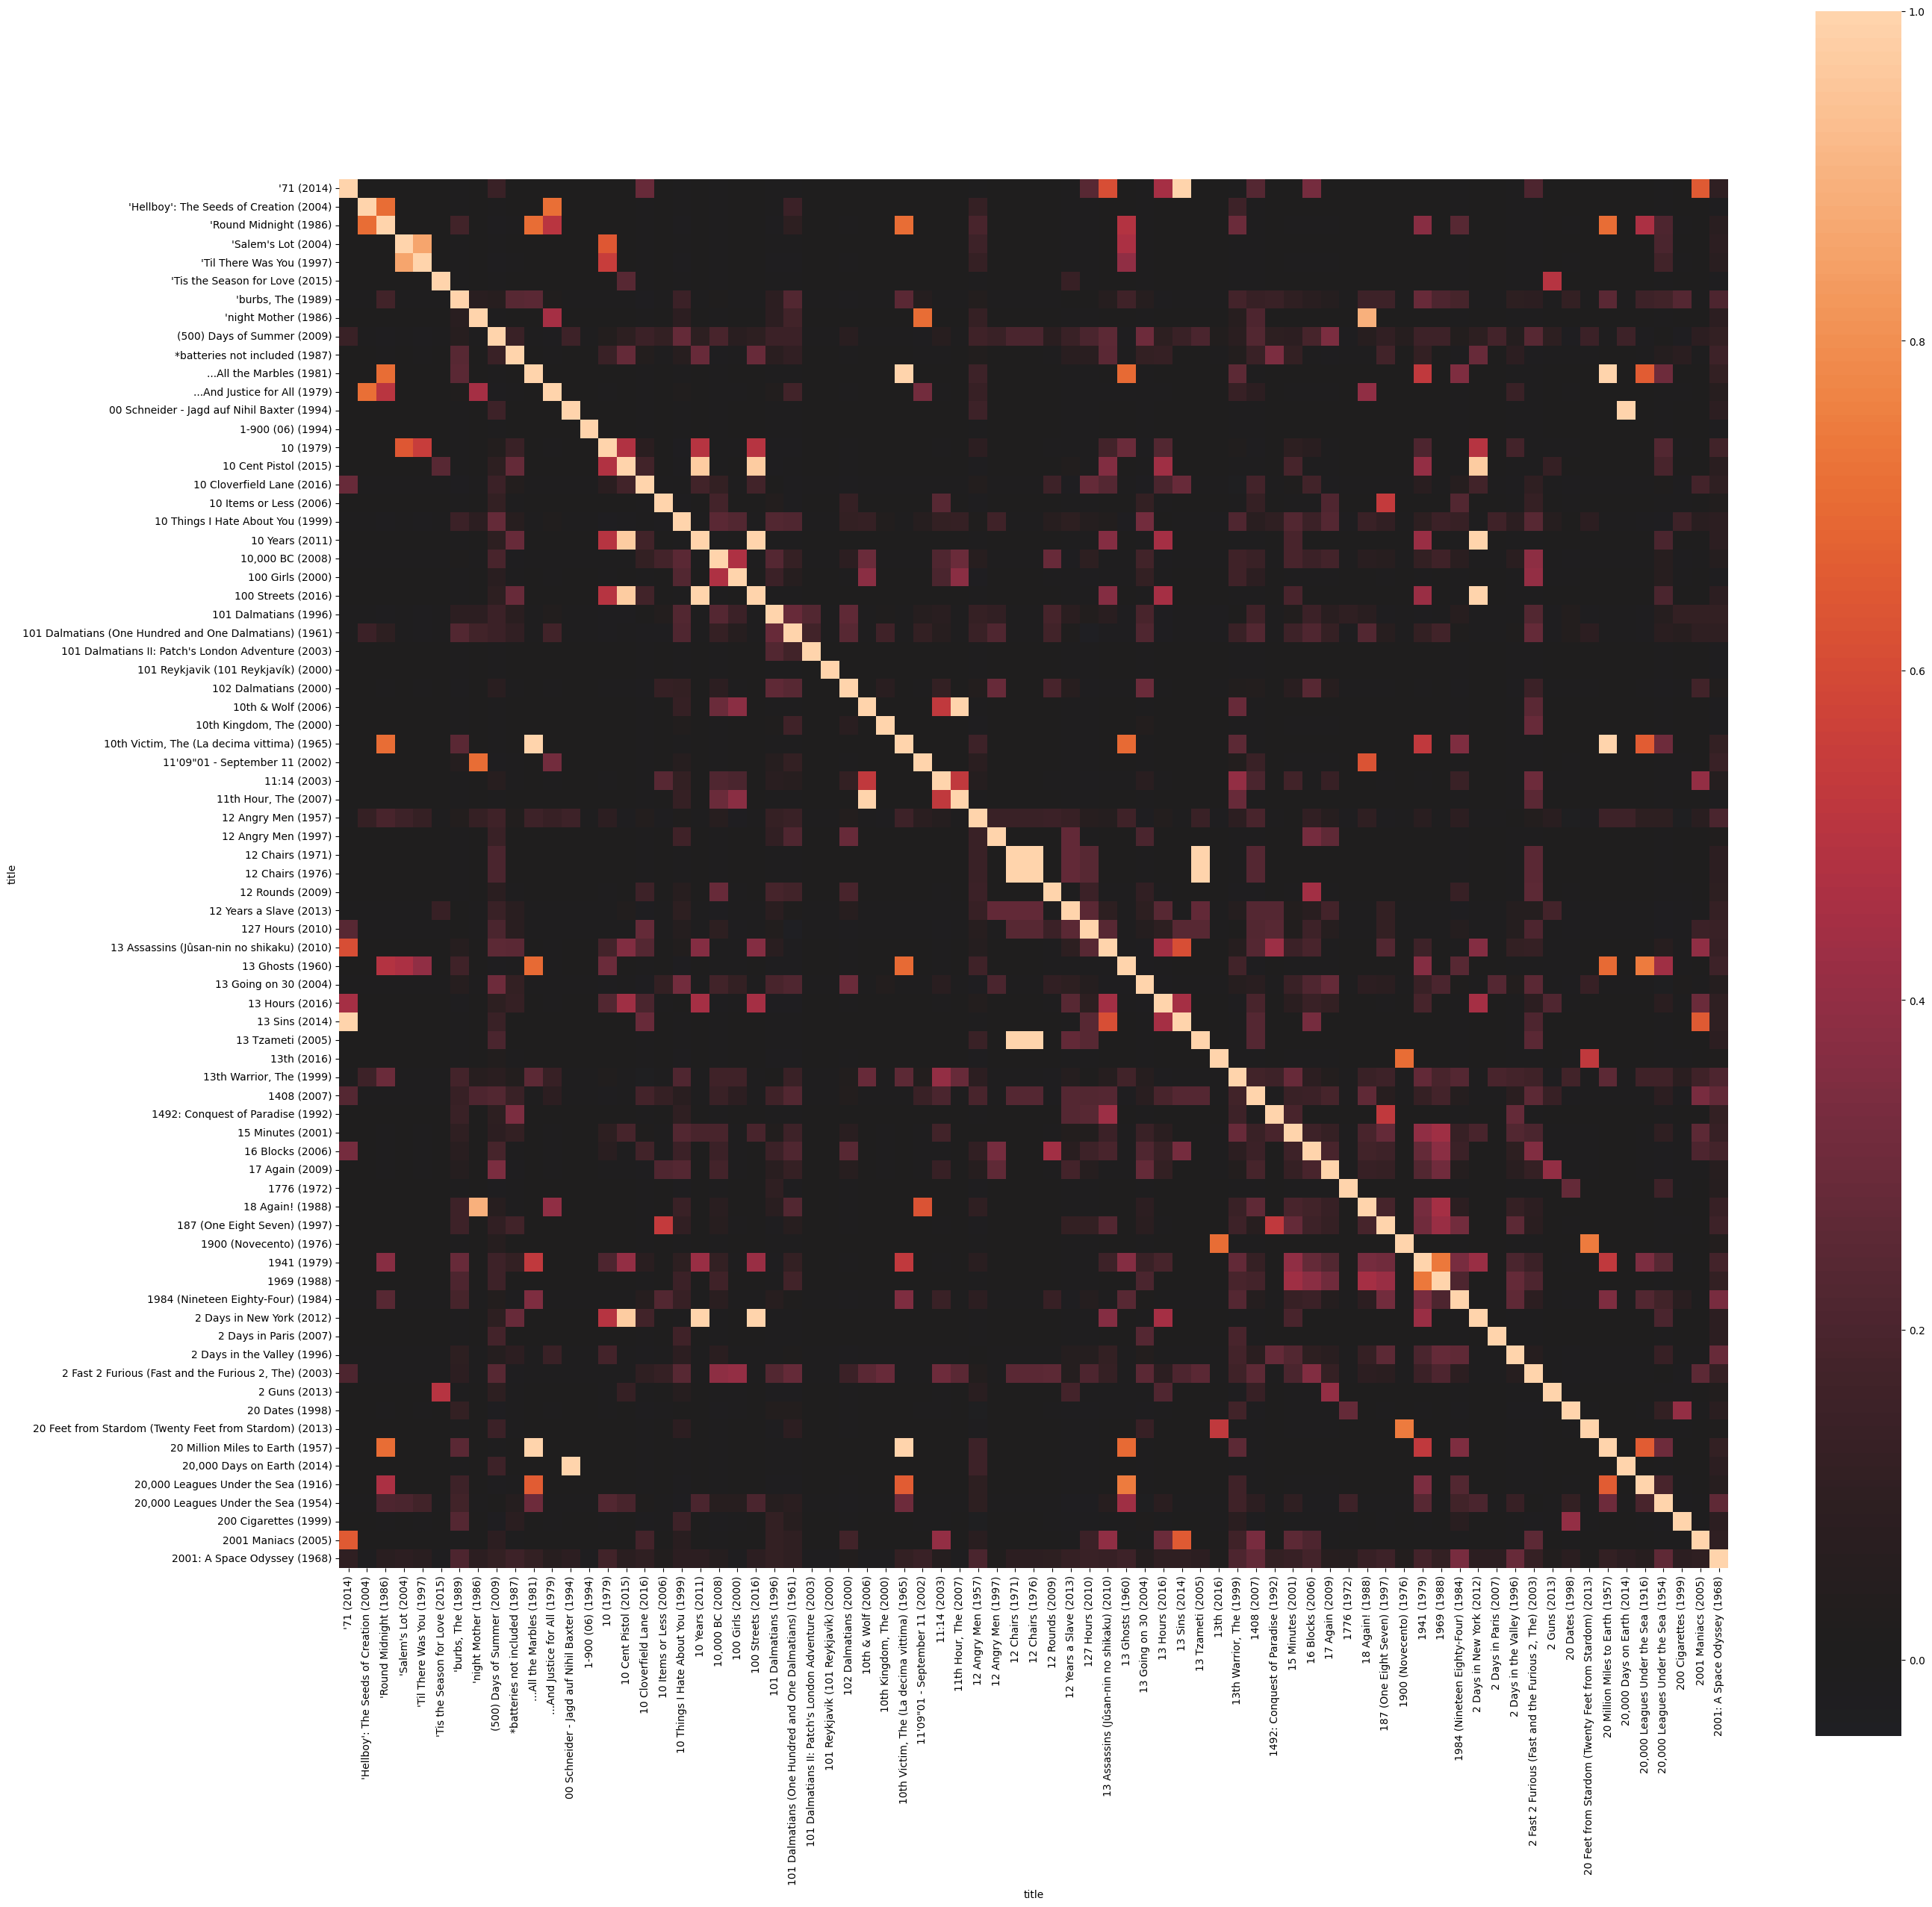

In [18]:
f, ax  =plt.subplots(figsize = (30,30))
sns.heatmap(newCorrMMatrix, square = True, center = 0, annot = False)

## Standardisation function for pearson correlation

In [19]:
def standardize(row):
    new_row = (row - row.mean())/(row.max()-row.min())
    return new_row

## Cosine Similarity Metric Evaluation

Netflix Data

In [20]:
df_temp = userRatings
df_std = df_temp.apply(standardize)

user_similarity = cosine_similarity(df_std.T)
user_similarity

array([[ 1.        , -0.11111111, -0.11111111, ..., -0.11111111,
        -0.11111111, -0.11111111],
       [-0.11111111,  1.        ,  1.        , ..., -0.11111111,
        -0.11111111, -0.11111111],
       [-0.11111111,  1.        ,  1.        , ..., -0.11111111,
        -0.11111111, -0.11111111],
       ...,
       [-0.11111111, -0.11111111, -0.11111111, ...,  1.        ,
        -0.11111111,  1.        ],
       [-0.11111111, -0.11111111, -0.11111111, ..., -0.11111111,
         1.        , -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111, ...,  1.        ,
        -0.11111111,  1.        ]])

MovieLen Data

In [21]:
df_tempM = userMRatings
df_stdM = df_tempM.apply(standardize)

user_Msimilarity = cosine_similarity(df_stdM.T)
user_Msimilarity

array([[ 1.        , -0.00164204, -0.0023241 , ...,  0.32528734,
        -0.00818543, -0.00164204],
       [-0.00164204,  1.        ,  0.706526  , ..., -0.00359434,
        -0.00818543, -0.00164204],
       [-0.0023241 ,  0.706526  ,  1.        , ..., -0.00508734,
        -0.01158546, -0.0023241 ],
       ...,
       [ 0.32528734, -0.00359434, -0.00508734, ...,  1.        ,
        -0.0179175 , -0.00359434],
       [-0.00818543, -0.00818543, -0.01158546, ..., -0.0179175 ,
         1.        , -0.00818543],
       [-0.00164204, -0.00164204, -0.0023241 , ..., -0.00359434,
        -0.00818543,  1.        ]])

## Pearson Correlation Evluation Metrics

Netflix Data

In [22]:
df_tempP = userRatings
df_pearson = np.corrcoef(df_tempP)
df_pearson

array([[ 1.        , -0.07801504, -0.0689259 ,  0.24841327, -0.1227754 ,
        -0.08693647, -0.09663519, -0.09577235, -0.0943731 , -0.07116474],
       [-0.07801504,  1.        , -0.07556069, -0.09465588, -0.13459374,
        -0.09530496, -0.10593727, -0.10499138, -0.10345744, -0.07801504],
       [-0.0689259 , -0.07556069,  1.        , -0.083628  , -0.11891289,
        -0.08420145, -0.09359505, -0.09275936, -0.09140413, -0.0689259 ],
       [ 0.24841327, -0.09465588, -0.083628  ,  1.        , -0.14896376,
        -0.10548028, -0.11724776,  0.01056372, -0.11450317, -0.08634439],
       [-0.1227754 , -0.13459374, -0.11891289, -0.14896376,  1.        ,
        -0.14998523, -0.16671773,  0.03147222, -0.16281512, -0.1227754 ],
       [-0.08693647, -0.09530496, -0.08420145, -0.10548028, -0.14998523,
         1.        , -0.11805175, -0.11699769, -0.11528833, -0.08693647],
       [-0.09663519, -0.10593727, -0.09359505, -0.11724776, -0.16671773,
        -0.11805175,  1.        , -0.13005007

MovieLen Data

In [23]:
df_tempPM = userMRatings
df_pearsonM = np.corrcoef(df_tempPM)
df_pearsonM

array([[ 1.        ,  0.01939572,  0.05305207, ...,  0.2622254 ,
         0.08543019,  0.09869338],
       [ 0.01939572,  1.        , -0.00259541, ...,  0.03272316,
         0.02437135,  0.08932142],
       [ 0.05305207, -0.00259541,  1.        , ...,  0.00808914,
        -0.00296406,  0.01595306],
       ...,
       [ 0.2622254 ,  0.03272316,  0.00808914, ...,  1.        ,
         0.10955596,  0.24890238],
       [ 0.08543019,  0.02437135, -0.00296406, ...,  0.10955596,
         1.        ,  0.03370186],
       [ 0.09869338,  0.08932142,  0.01595306, ...,  0.24890238,
         0.03370186,  1.        ]])

## Euclidean Distance Evaluation Metrics

Netflix Data

In [24]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_dist = euclidean_distances(df_std.T)
euclidean_dist

array([[0.        , 1.41421356, 1.41421356, ..., 1.41421356, 1.41421356,
        1.41421356],
       [1.41421356, 0.        , 0.        , ..., 1.41421356, 1.41421356,
        1.41421356],
       [1.41421356, 0.        , 0.        , ..., 1.41421356, 1.41421356,
        1.41421356],
       ...,
       [1.41421356, 1.41421356, 1.41421356, ..., 0.        , 1.41421356,
        0.        ],
       [1.41421356, 1.41421356, 1.41421356, ..., 1.41421356, 0.        ,
        1.41421356],
       [1.41421356, 1.41421356, 1.41421356, ..., 0.        , 1.41421356,
        0.        ]])

MovieLen Data

In [25]:
euclidean_distM = euclidean_distances(df_stdM.T)
euclidean_distM

array([[0.        , 1.41421356, 1.7315775 , ..., 1.77348411, 3.42436066,
        1.41421356],
       [1.41421356, 0.        , 0.99917999, ..., 2.08452534, 3.42436066,
        1.41421356],
       [1.7315775 , 0.99917999, 0.        , ..., 2.31375077, 3.57418109,
        1.7315775 ],
       ...,
       [1.77348411, 2.08452534, 2.31375077, ..., 0.        , 3.77120453,
        2.08452534],
       [3.42436066, 3.42436066, 3.57418109, ..., 3.77120453, 0.        ,
        3.42436066],
       [1.41421356, 1.41421356, 1.7315775 , ..., 2.08452534, 3.42436066,
        0.        ]])

## Cosine Similarity Metrics Recommendation System


Netflix Data

In [26]:
user_similarity_df = pd.DataFrame(user_similarity,index=userRatings.columns,columns=userRatings.columns)
user_similarity_df

title                                               60 Days In  \
title                                                            
60 Days In                                            1.000000   
Akame ga Kill!                                       -0.111111   
Attack on Titan                                      -0.111111   
Avengers: Infinity War                               -0.166667   
Blade Runner: The Final Cut                          -0.111111   
Bling Empire                                          1.000000   
Bob Ross: Happy Accidents, Betrayal & Greed          -0.111111   
Cops and Robbers                                     -0.111111   
Cosmic Sin                                           -0.111111   
Creating an Army of the Dead                         -0.111111   
DOTA: Dragon's Blood                                 -0.111111   
Death Note                                           -0.111111   
Dick Johnson Is Dead                                 -0.111111   
Durarara!!                                           -0.111111   
Friday the 13th                                      -0.111111   
Friends                                              -0.111111   
Green Lantern                                        -0.111111   
Hunter X Hunter (2011)                               -0.111111   
Ip Man 4: The Finale                                 -0.111111   
Jiu Jitsu                                            -0.164581   
Lucifer                                              -0.111111   
Monster Hunter: Legends of the Guild                 -0.111111   
My Heroes Were Cowboys                               -0.111111   
Next in Fashion                                       1.000000   
Ninja Assassin                                       -0.111111   
ONE PIECE                                            -0.111111   
Pieces of a Woman                                    -0.111111   
Record of Ragnarok                                   -0.166667   
Rogue Warfare: Death of a Nation                     -0.111111   
Safe House                                           -0.111111   
Scream 2                                             -0.111111   
Seaspiracy                                           -0.111111   
Sex Education                                        -0.111111   
Silent Hill: Revelation                              -0.111111   
Sing On!                                              1.000000   
Spider-Man 3                                         -0.111111   
Spider-Man: Into the Spider-Verse                    -0.111111   
Sword Art Online                                     -0.111111   
Tarzan                                               -0.111111   
Tarzan 2                                             -0.111111   
Teen Mom 2                                            1.000000   
The American Barbecue Showdown                        1.000000   
The Conjuring                                        -0.111111   
The Devil Is a Part-Timer!                           -0.111111   
The Final Destination                                -0.111111   
The Impossible                                       -0.111111   
The Karate Kid                                       -0.111111   
The Karate Kid Part II                               -0.111111   
The Kissing Booth 3                                  -0.111111   
The Secret Life of Pets 2                            -0.111111   
The Seven Deadly Sins                                -0.111111   
The Seventh Day                                      -0.111111   
The Show Must Go On: The Queen + Adam Lambert S...    1.000000   
Tinker Bell and the Legend of the NeverBeast         -0.111111   
Truth or Dare                                        -0.111111   
Two Distant Strangers                                -0.111111   
Why Did You Kill Me?                                 -0.111111   
Worth                                                -0.111111   

title                                  

Heatmap for Netflix Cosine Similarity

<AxesSubplot: xlabel='title', ylabel='title'>

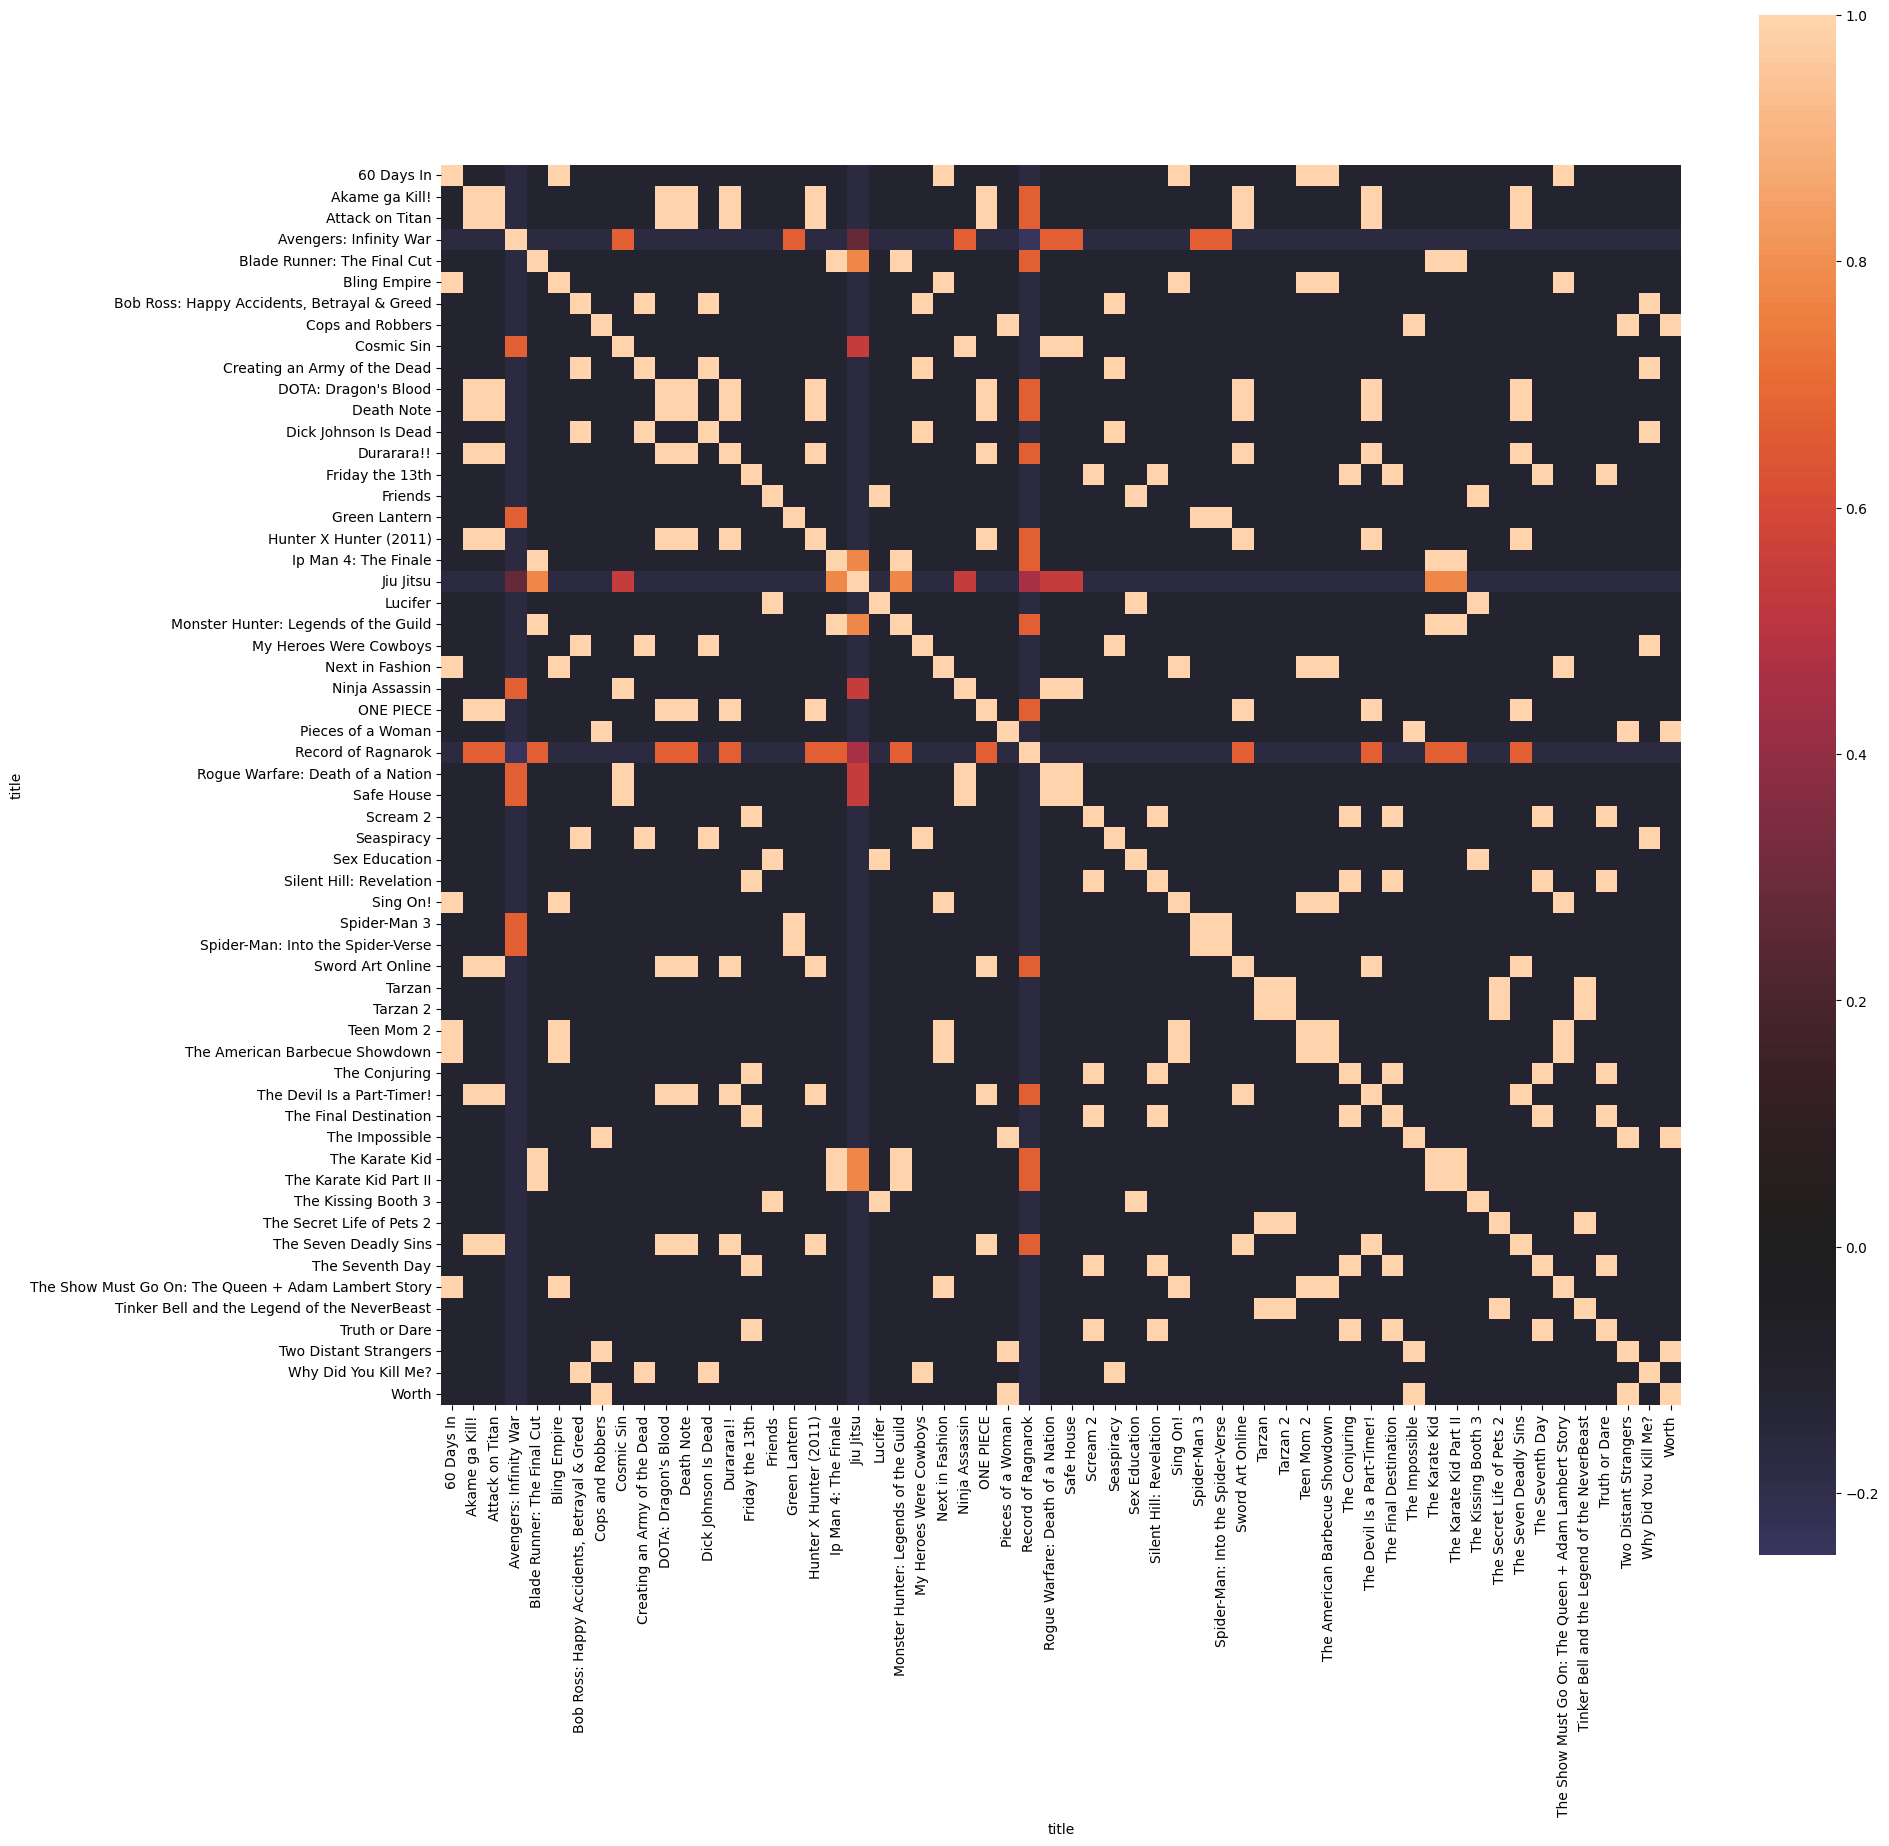

In [27]:
f, ax  =plt.subplots(figsize = (20,20))
sns.heatmap(user_similarity_df, square = True, center = 0, annot = False)

MovieLen Data

In [28]:
user_Msimilarity_df = pd.DataFrame(user_Msimilarity,index=userMRatings.columns,columns=userMRatings.columns)
user_Msimilarity_df

title                                      '71 (2014)  \
title                                                   
'71 (2014)                                   1.000000   
'Hellboy': The Seeds of Creation (2004)     -0.001642   
'Round Midnight (1986)                      -0.002324   
'Salem's Lot (2004)                         -0.001642   
'Til There Was You (1997)                   -0.002254   
...                                               ...   
eXistenZ (1999)                             -0.007675   
xXx (2002)                                   0.134327   
xXx: State of the Union (2005)               0.325287   
¡Three Amigos! (1986)                       -0.008185   
À nous la liberté (Freedom for Us) (1931)   -0.001642   

title                                      'Hellboy': The Seeds of Creation (2004)  \
title                                                                                
'71 (2014)                                                               -0.001642   
'Hellboy': The Seeds of Creation (2004)                                   1.000000   
'Round Midnight (1986)                                                    0.706526   
'Salem's Lot (2004)                                                      -0.001642   
'Til There Was You (1997)                                                -0.002254   
...                                                                            ...   
eXistenZ (1999)                                                          -0.007675   
xXx (2002)                                                               -0.007744   
xXx: State of the Union (2005)                                           -0.003594   
¡Three Amigos! (1986)                                                    -0.008185   
À nous la liberté (Freedom for Us) (1931)                                -0.001642   

title                                      'Round Midnight (1986)  \
title                                                               
'71 (2014)                                              -0.002324   
'Hellboy': The Seeds of Creation (2004)                  0.706526   
'Round Midnight (1986)                                   1.000000   
'Salem's Lot (2004)                                     -0.002324   
'Til There Was You (1997)                               -0.003191   
...                                                           ...   
eXistenZ (1999)                                         -0.010863   
xXx (2002)                                              -0.010961   
xXx: State of the Union (2005)                          -0.005087   
¡Three Amigos! (1986)                                   -0.011585   
À nous la liberté (Freedom for Us) (1931)               -0.002324   

title                                      'Salem's Lot (2004)  \
title                                                            
'71 (2014)                                           -0.001642   
'Hellboy': The Seeds of Creation (2004)              -0.001642   
'Round Midnight (1986)                               -0.002324   
'Salem's Lot (2004)                                   1.000000   
'Til There Was You (1997)                             0.857269   
...                                                        ...   
eXistenZ (1999)                                      -0.007675   
xXx (2002)                                           -0.007744   
xXx: State of the Union (2005)                       -0.003594   
¡Three Amigos! (1986)                                -0.008185   
À nous la liberté (Freedom for Us) (1931)            -0.001642   

title                                      'Til There Was You (1997)  \
title                                                                  
'71 (2014)                                                 -0.002254   
'Hellboy': The Seeds of Creation (2004)                    -0.002254   
'Round Midnight (1986)                                     -0.003191   
'Salem's Lot (2004)   

In [29]:
newUser_Msimilarity_df = user_Msimilarity_df.iloc[0:75,0:75]


<AxesSubplot: xlabel='title', ylabel='title'>

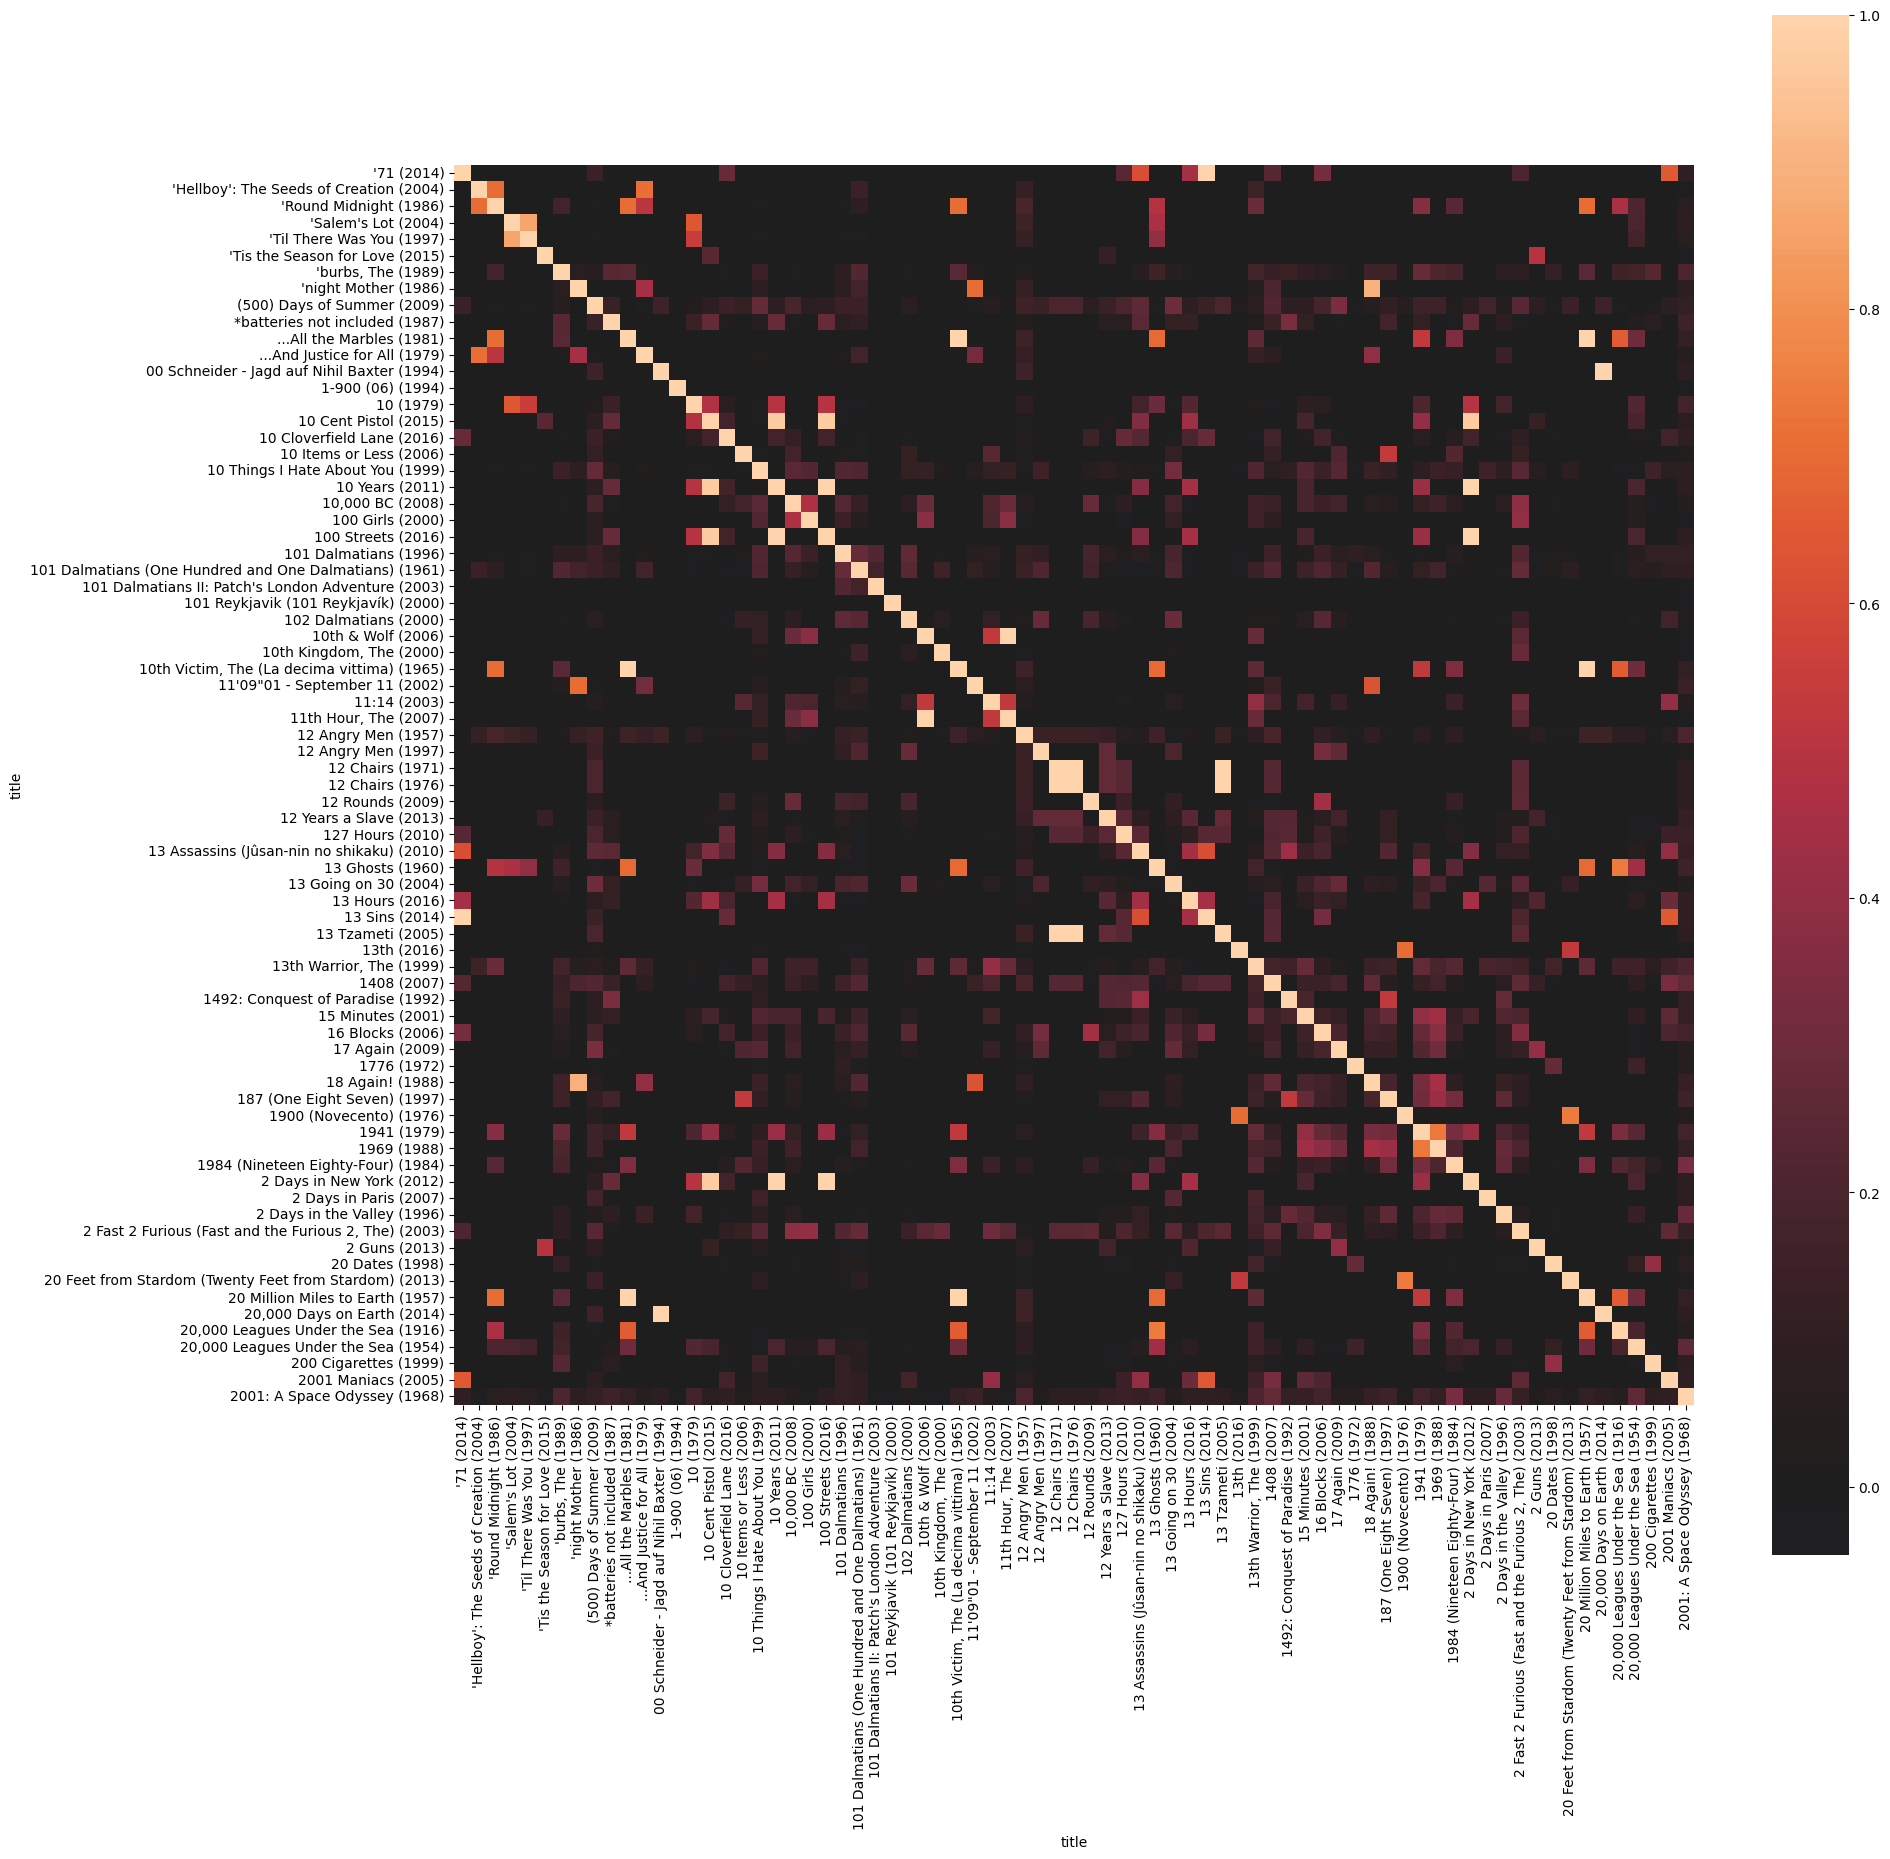

In [30]:
f, ax  =plt.subplots(figsize = (20,20))
sns.heatmap(newUser_Msimilarity_df, square = True, center = 0, annot = False)

In [31]:
def get_similar_cosine(movie_name, user_rating, user_similarity_df):
    similar_score = user_similarity_df[movie_name]
    similar_score = similar_score.sort_values(ascending=False)
    return similar_score

In [32]:
new_user1 = [("ONE PIECE",5),("Sword Art Online",2),("Sex Education",4),("Hunter X Hunter (2011)",5),("Attack on Titan",4)]

similar_movies = pd.DataFrame()
for movie,rating in new_user1:
    similar_movies = similar_movies.append(get_similar_cosine(movie,rating,user_similarity_df),ignore_index = True)

for (x,_) in new_user1:
    del similar_movies[x]
similar_movies.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\331316919.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar_cosine(movie,rating,user_similarity_df),ignore_index = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\331316919.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar_cosine(movie,rating,user_similarity_df),ignore_index = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\331316919.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar_cosine(movie,rating,user_similarity_df),ignore_index = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\331316919.p

title  The Devil Is a Part-Timer!  DOTA: Dragon's Blood  \
0                        1.000000              1.000000   
1                        1.000000              1.000000   
2                       -0.111111             -0.111111   
3                        1.000000              1.000000   
4                        1.000000              1.000000   

title  The Seven Deadly Sins  Akame ga Kill!  Durarara!!  Death Note  \
0                   1.000000        1.000000    1.000000    1.000000   
1                   1.000000        1.000000    1.000000    1.000000   
2                  -0.111111       -0.111111   -0.111111   -0.111111   
3                   1.000000        1.000000    1.000000    1.000000   
4                   1.000000        1.000000    1.000000    1.000000   

title  Record of Ragnarok  The Karate Kid Part II  The Karate Kid  \
0                0.666667               -0.111111       -0.111111   
1                0.666667               -0.111111       -0.111111   
2               -0.166667               -0.111111       -0.111111   
3                0.666667               -0.111111       -0.111111   
4                0.666667               -0.111111       -0.111111   

title  Blade Runner: The Final Cut  ...  Spider-Man 3  \
0                        -0.111111  ...     -0.111111   
1                        -0.111111  ...     -0.111111   
2                        -0.111111  ...     -0.111111   
3                        -0.111111  ...     -0.111111   
4                        -0.111111  ...     -0.111111   

title  Rogue Warfare: Death of a Nation  Pieces of a Woman  Ninja Assassin  \
0                             -0.111111          -0.111111       -0.111111   
1                             -0.111111          -0.111111       -0.111111   
2                             -0.111111          -0.111111       -0.111111   
3                             -0.111111          -0.111111       -0.111111   
4                             -0.111111          -0.111111       -0.111111   

title  Creating an Army of the Dead  Cosmic Sin  Cops and Robbers     Worth  \
0                         -0.111111   -0.111111         -0.111111 -0.111111   
1                         -0.111111   -0.111111         -0.111111 -0.111111   
2                         -0.111111   -0.111111         -0.111111 -0.111111   
3                         -0.111111   -0.111111         -0.111111 -0.111111   
4                         -0.111111   -0.111111         -0.111111 -0.111111   

title  Jiu Jitsu  Avengers: Infinity War  
0      -0.164581               -0.166667  
1      -0.164581               -0.166667  
2      -0.164581               -0.166667  
3      -0.164581               -0.166667  
4      -0.164581               -0.166667  

[5 rows x 53 columns]

In [33]:
new_user2 = [("Inception (2010)", 5), ("Avengers: Infinity War - Part I (2018)", 4), ("Lion King, The (1994)", 4), ("A Quiet Place (2018)", 4), ("Avatar (2009)", 5)]

similar_Mmovies = pd.DataFrame()
for movie,rating in new_user2:
    similar_Mmovies = similar_Mmovies.append(get_similar_cosine(movie,rating,user_Msimilarity_df),ignore_index = True)

for (x,_) in new_user2:
    del similar_Mmovies[x]
similar_Mmovies.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\300738570.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_Mmovies = similar_Mmovies.append(get_similar_cosine(movie,rating,user_Msimilarity_df),ignore_index = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\300738570.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_Mmovies = similar_Mmovies.append(get_similar_cosine(movie,rating,user_Msimilarity_df),ignore_index = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\300738570.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_Mmovies = similar_Mmovies.append(get_similar_cosine(movie,rating,user_Msimilarity_df),ignore_index = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\30

title  Dark Knight, The (2008)  Inglourious Basterds (2009)  \
0                     0.646113                     0.574834   
1                     0.225907                     0.196712   
2                     0.161202                     0.075084   
3                     0.080441                     0.171411   
4                     0.447723                     0.431010   

title  Shutter Island (2010)  Dark Knight Rises, The (2012)  \
0                   0.557746                       0.549934   
1                   0.241099                       0.283297   
2                   0.116458                       0.103551   
3                   0.201416                       0.116580   
4                   0.384880                       0.371441   

title  Interstellar (2014)  Avengers, The (2012)  Up (2009)  \
0                 0.541386              0.519195   0.514463   
1                 0.229449              0.274330   0.208002   
2                 0.087591              0.114559   0.176499   
3                 0.160398              0.089948   0.059075   
4                 0.358363              0.497880   0.567484   

title  Django Unchained (2012)  Social Network, The (2010)  Iron Man (2008)  \
0                     0.510479                    0.491725         0.480998   
1                     0.138302                    0.157210         0.301064   
2                     0.085448                    0.118530         0.152235   
3                     0.075424                    0.189678         0.062658   
4                     0.448918                    0.403393         0.559671   

title  ...  Cliffhanger (1993)  Madness of King George, The (1994)  \
0      ...           -0.117963                           -0.118423   
1      ...            0.010654                           -0.031490   
2      ...            0.349516                            0.046577   
3      ...            0.055695                           -0.015745   
4      ...           -0.049817                           -0.067004   

title  Piano, The (1993)  Star Trek: Generations (1994)  Firm, The (1993)  \
0              -0.120663                      -0.121680         -0.123244   
1              -0.045435                      -0.008654         -0.061340   
2               0.140426                       0.282748          0.321094   
3              -0.022717                      -0.031865         -0.030670   
4              -0.098948                      -0.016125         -0.095928   

title  Crimson Tide (1995)  True Lies (1994)  Disclosure (1994)  \
0                -0.127539         -0.130696          -0.149917   
1                -0.022647          0.038892          -0.042274   
2                 0.282162          0.353558           0.207169   
3                 0.042397          0.026294          -0.021137   
4                -0.057028          0.003800          -0.103304   

title  Get Shorty (1995)  Clear and Present Danger (1994)  
0              -0.162090                        -0.193168  
1              -0.035336                        -0.064829  
2               0.233214                         0.269892  
3              -0.028368                        -0.032414  
4              -0.086680                        -0.094719  

[5 rows x 9714 columns]

Top 10 netflix recommendations

In [34]:
similar_movies.sum().sort_values(ascending=False).head(10)

title
The Devil Is a Part-Timer!    3.888889
Durarara!!                    3.888889
Death Note                    3.888889
DOTA: Dragon's Blood          3.888889
Akame ga Kill!                3.888889
The Seven Deadly Sins         3.888889
Record of Ragnarok            2.500000
The Kissing Booth 3           0.555556
Lucifer                       0.555556
Friends                       0.555556
dtype: float64

In [35]:
similar_Mmovies.sum().sort_values(ascending=False).head(10)

title
Untitled Spider-Man Reboot (2017)    1.619482
Deadpool 2 (2018)                    1.597082
Dark Knight, The (2008)              1.561386
Iron Man (2008)                      1.556626
Guardians of the Galaxy (2014)       1.531743
Up (2009)                            1.525522
Alien: Covenant (2017)               1.505958
Ant-Man (2015)                       1.505680
Sherlock Holmes (2009)               1.504437
Shutter Island (2010)                1.501598
dtype: float64

## Pearson Similarity Recommendation System

In [36]:
corrMatrix = userRatings.corr(method='pearson')
corrMatrix.head(10)

title                                        60 Days In  Akame ga Kill!  \
title                                                                     
60 Days In                                     1.000000       -0.111111   
Akame ga Kill!                                -0.111111        1.000000   
Attack on Titan                               -0.111111        1.000000   
Avengers: Infinity War                        -0.166667       -0.166667   
Blade Runner: The Final Cut                   -0.111111       -0.111111   
Bling Empire                                   1.000000       -0.111111   
Bob Ross: Happy Accidents, Betrayal & Greed   -0.111111       -0.111111   
Cops and Robbers                              -0.111111       -0.111111   
Cosmic Sin                                    -0.111111       -0.111111   
Creating an Army of the Dead                  -0.111111       -0.111111   

title                                        Attack on Titan  \
title                                                          
60 Days In                                         -0.111111   
Akame ga Kill!                                      1.000000   
Attack on Titan                                     1.000000   
Avengers: Infinity War                             -0.166667   
Blade Runner: The Final Cut                        -0.111111   
Bling Empire                                       -0.111111   
Bob Ross: Happy Accidents, Betrayal & Greed        -0.111111   
Cops and Robbers                                   -0.111111   
Cosmic Sin                                         -0.111111   
Creating an Army of the Dead                       -0.111111   

title                                        Avengers: Infinity War  \
title                                                                 
60 Days In                                                -0.166667   
Akame ga Kill!                                            -0.166667   
Attack on Titan                                           -0.166667   
Avengers: Infinity War                                     1.000000   
Blade Runner: The Final Cut                               -0.166667   
Bling Empire                                              -0.166667   
Bob Ross: Happy Accidents, Betrayal & Greed               -0.166667   
Cops and Robbers                                          -0.166667   
Cosmic Sin                                                 0.666667   
Creating an Army of the Dead                              -0.166667   

title                                        Blade Runner: The Final Cut  \
title                                                                      
60 Days In                                                     -0.111111   
Akame ga Kill!                                                 -0.111111   
Attack on Titan                                                -0.111111   
Avengers: Infinity War                                         -0.166667   
Blade Runner: The Final Cut                                     1.000000   
Bling Empire                                                   -0.111111   
Bob Ross: Happy Accidents, Betrayal & Greed                    -0.111111   
Cops and Robbers                                               -0.111111   
Cosmic Sin                                                     -0.111111   
Creating an Army of the Dead                                   -0.111111   

title                                        Bling Empire  \
title                                                       
60 Days In                                       1.000000   
Akame ga Kill!                                  -0.111111   
Attack on Titan                                 -0.111111   
Avengers: Infinity War                          -0.166667   
Blade Runner: The Final Cut                     -0.111111   
Bling Empire                                     1.000000   
Bob Ross: Happy Accidents, Betrayal & Greed     -0.111111   
Cops and Robber

In [37]:
corrMMatrix = userMRatings.corr(method='pearson')
corrMMatrix.head(10)

title                                    '71 (2014)  \
title                                                 
'71 (2014)                                 1.000000   
'Hellboy': The Seeds of Creation (2004)   -0.001642   
'Round Midnight (1986)                    -0.002324   
'Salem's Lot (2004)                       -0.001642   
'Til There Was You (1997)                 -0.002254   
'Tis the Season for Love (2015)           -0.001642   
'burbs, The (1989)                        -0.006407   
'night Mother (1986)                      -0.001642   
(500) Days of Summer (2009)                0.135943   
*batteries not included (1987)            -0.004325   

title                                    'Hellboy': The Seeds of Creation (2004)  \
title                                                                              
'71 (2014)                                                             -0.001642   
'Hellboy': The Seeds of Creation (2004)                                 1.000000   
'Round Midnight (1986)                                                  0.706526   
'Salem's Lot (2004)                                                    -0.001642   
'Til There Was You (1997)                                              -0.002254   
'Tis the Season for Love (2015)                                        -0.001642   
'burbs, The (1989)                                                     -0.006407   
'night Mother (1986)                                                   -0.001642   
(500) Days of Summer (2009)                                            -0.010568   
*batteries not included (1987)                                         -0.004325   

title                                    'Round Midnight (1986)  \
title                                                             
'71 (2014)                                            -0.002324   
'Hellboy': The Seeds of Creation (2004)                0.706526   
'Round Midnight (1986)                                 1.000000   
'Salem's Lot (2004)                                   -0.002324   
'Til There Was You (1997)                             -0.003191   
'Tis the Season for Love (2015)                       -0.002324   
'burbs, The (1989)                                     0.170199   
'night Mother (1986)                                  -0.002324   
(500) Days of Summer (2009)                           -0.014958   
*batteries not included (1987)                        -0.006121   

title                                    'Salem's Lot (2004)  \
title                                                          
'71 (2014)                                         -0.001642   
'Hellboy': The Seeds of Creation (2004)            -0.001642   
'Round Midnight (1986)                             -0.002324   
'Salem's Lot (2004)                                 1.000000   
'Til There Was You (1997)                           0.857269   
'Tis the Season for Love (2015)                    -0.001642   
'burbs, The (1989)                                 -0.006407   
'night Mother (1986)                               -0.001642   
(500) Days of Summer (2009)                        -0.010568   
*batteries not included (1987)                     -0.004325   

title                                    'Til There Was You (1997)  \
title                                                                
'71 (2014)                                               -0.002254   
'Hellboy': The Seeds of Creation (2004)                  -0.002254   
'Round Midnight (1986)                                   -0.003191   
'Salem's Lot (2004)                                       0.857269   
'Til There Was You (1997)                                 1.000000   
'Tis the Season for Love (2015)                          -0.002254   
'burbs, The (1989)                                       -0.008797   
'night Mother (1986)                                     -0.002254   
(500) Days of Summer (2009)                             

In [38]:
def get_similar_pearson(movie_name, user_rating, corrMatrix):
    similar_score = corrMatrix[movie_name]*(user_rating-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    return similar_score

To run the search similarity - Adjust the parameters of the new_user1 = [("Movie", ratings) , ("Movie", ratings)]

In [39]:
new_user1 = [("ONE PIECE",5),("Sword Art Online",2),("Sex Education",4),("Hunter X Hunter (2011)",5),("Attack on Titan",4)]
similar_movies = pd.DataFrame()
for movie,rating in new_user1:
    similar_movies = similar_movies.append(get_similar_pearson(movie,rating, corrMatrix),ignore_index = True)

for (x,_) in new_user1:
    del similar_movies[x]
similar_movies.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\2451973499.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar_pearson(movie,rating, corrMatrix),ignore_index = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\2451973499.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar_pearson(movie,rating, corrMatrix),ignore_index = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\2451973499.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar_pearson(movie,rating, corrMatrix),ignore_index = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\2451973499.py:4: FutureWar

title  Akame ga Kill!  Durarara!!  Death Note  The Devil Is a Part-Timer!  \
0            2.500000    2.500000    2.500000                    2.500000   
1           -0.500000   -0.500000   -0.500000                   -0.500000   
2           -0.166667   -0.166667   -0.166667                   -0.166667   
3            2.500000    2.500000    2.500000                    2.500000   
4            1.500000    1.500000    1.500000                    1.500000   

title  The Seven Deadly Sins  DOTA: Dragon's Blood  Record of Ragnarok  \
0                   2.500000              2.500000            1.666667   
1                  -0.500000             -0.500000           -0.333333   
2                  -0.166667             -0.166667           -0.250000   
3                   2.500000              2.500000            1.666667   
4                   1.500000              1.500000            1.000000   

title  The Impossible    Tarzan   Friends  ...  Creating an Army of the Dead  \
0           -0.277778 -0.277778 -0.277778  ...                     -0.277778   
1            0.055556  0.055556  0.055556  ...                      0.055556   
2           -0.166667 -0.166667  1.500000  ...                     -0.166667   
3           -0.277778 -0.277778 -0.277778  ...                     -0.277778   
4           -0.166667 -0.166667 -0.166667  ...                     -0.166667   

title  The Seventh Day  Truth or Dare  Silent Hill: Revelation  \
0            -0.277778      -0.277778                -0.277778   
1             0.055556       0.055556                 0.055556   
2            -0.166667      -0.166667                -0.166667   
3            -0.277778      -0.277778                -0.277778   
4            -0.166667      -0.166667                -0.166667   

title  The Final Destination  The Conjuring  Scream 2  Seaspiracy  Jiu Jitsu  \
0                  -0.277778      -0.277778 -0.277778   -0.277778  -0.411452   
1                   0.055556       0.055556  0.055556    0.055556   0.082290   
2                  -0.166667      -0.166667 -0.166667   -0.166667  -0.246871   
3                  -0.277778      -0.277778 -0.277778   -0.277778  -0.411452   
4                  -0.166667      -0.166667 -0.166667   -0.166667  -0.246871   

title  Avengers: Infinity War  
0                   -0.416667  
1                    0.083333  
2                   -0.250000  
3                   -0.416667  
4                   -0.250000  

[5 rows x 53 columns]

In [40]:
similar_movies.sum().sort_values(ascending=False).head(10)

title
Akame ga Kill!                5.833333
The Devil Is a Part-Timer!    5.833333
Durarara!!                    5.833333
Death Note                    5.833333
DOTA: Dragon's Blood          5.833333
The Seven Deadly Sins         5.833333
Record of Ragnarok            3.750000
The Kissing Booth 3           0.833333
Friends                       0.833333
Lucifer                       0.833333
dtype: float64

To run the search similarity - Adjust the parameters of the new_user2 = [("Movie", ratings) , ("Movie", ratings)]

In [41]:
new_user2 = [("Inception (2010)", 5), ("Avengers: Infinity War - Part I (2018)", 4), ("Lion King, The (1994)", 4), ("A Quiet Place (2018)", 4), ("Avatar (2009)", 5)]
similar_Mmovies = pd.DataFrame()
for movie,rating in new_user2:
    similar_Mmovies = similar_Mmovies.append(get_similar_pearson(movie,rating, corrMMatrix),ignore_index = True)

for (x,_) in new_user2:
    del similar_Mmovies[x]
similar_Mmovies.head()

C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\1268381869.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_Mmovies = similar_Mmovies.append(get_similar_pearson(movie,rating, corrMMatrix),ignore_index = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\1268381869.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_Mmovies = similar_Mmovies.append(get_similar_pearson(movie,rating, corrMMatrix),ignore_index = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\1268381869.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_Mmovies = similar_Mmovies.append(get_similar_pearson(movie,rating, corrMMatrix),ignore_index = True)
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\1268381869.py:4: 

title  Dark Knight, The (2008)  Inglourious Basterds (2009)  \
0                     1.615283                     1.437085   
1                     0.338861                     0.295067   
2                     0.241803                     0.112627   
3                     0.120661                     0.257116   
4                     1.119308                     1.077525   

title  Shutter Island (2010)  Dark Knight Rises, The (2012)  \
0                   1.394365                       1.374834   
1                   0.361648                       0.424946   
2                   0.174687                       0.155326   
3                   0.302124                       0.174870   
4                   0.962199                       0.928602   

title  Interstellar (2014)  Avengers, The (2012)  Up (2009)  \
0                 1.353466              1.297987   1.286157   
1                 0.344173              0.411495   0.312002   
2                 0.131386              0.171839   0.264749   
3                 0.240598              0.134921   0.088612   
4                 0.895908              1.244699   1.418710   

title  Django Unchained (2012)  Social Network, The (2010)  Iron Man (2008)  \
0                     1.276198                    1.229312         1.202496   
1                     0.207452                    0.235814         0.451596   
2                     0.128172                    0.177795         0.228353   
3                     0.113137                    0.284518         0.093986   
4                     1.122295                    1.008483         1.399178   

title  ...  Cliffhanger (1993)  Madness of King George, The (1994)  \
0      ...           -0.294907                           -0.296058   
1      ...            0.015981                           -0.047234   
2      ...            0.524274                            0.069865   
3      ...            0.083543                           -0.023617   
4      ...           -0.124543                           -0.167509   

title  Piano, The (1993)  Star Trek: Generations (1994)  Firm, The (1993)  \
0              -0.301658                      -0.304200         -0.308111   
1              -0.068152                      -0.012981         -0.092010   
2               0.210639                       0.424123          0.481640   
3              -0.034076                      -0.047797         -0.046005   
4              -0.247370                      -0.040313         -0.239820   

title  Crimson Tide (1995)  True Lies (1994)  Disclosure (1994)  \
0                -0.318846         -0.326740          -0.374793   
1                -0.033970          0.058339          -0.063411   
2                 0.423243          0.530337           0.310754   
3                 0.063595          0.039442          -0.031705   
4                -0.142571          0.009499          -0.258260   

title  Get Shorty (1995)  Clear and Present Danger (1994)  
0              -0.405226                        -0.482921  
1              -0.053003                        -0.097243  
2               0.349821                         0.404838  
3              -0.042552                        -0.048621  
4              -0.216699                        -0.236799  

[5 rows x 9714 columns]

In [42]:
similar_Mmovies.sum().sort_values(ascending=False).head(10)

title
Dark Knight, The (2008)           3.435916
Iron Man (2008)                   3.375609
Up (2009)                         3.370230
Avengers, The (2012)              3.260942
Hangover, The (2009)              3.249295
Sherlock Holmes (2009)            3.223721
Guardians of the Galaxy (2014)    3.217329
WALL·E (2008)                     3.201764
Shutter Island (2010)             3.195023
Inglourious Basterds (2009)       3.179420
dtype: float64

#### Evaluation Metric : RMSE ( Root Mean Squared Error )

In [43]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    return sqrt(mean_squared_error(pred, actual))

# Predict ratings on the training data with both similarity score
user_prediction = predict(euclidean_dist, corrMatrix, type='user')
item_prediction = predict(euclidean_dist, corrMatrix, type='item')
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, corrMatrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, corrMatrix)))

User-based CF RMSE: 1.4075937705492223
Item-based CF RMSE: 0.623415600864975


# USER-USER COLLABORATIVE FILTERING USING SIMILAR GENRE AVERAGE RATING

## MOVIE LENS

 Retrieving Data from CSV

In [45]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.merge(movies, ratings)

ratings.drop('timestamp', axis = 1, inplace=True)
ratings.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating  
0       1     4.0  
1       5     4.0  
2       7     4.5  
3      15     2.5  
4      17     4.5

## Pre-processing of data

Filling non value data as 0

In [46]:
ratings['rating'] = ratings['rating'].fillna('0')
ratings.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating  
0       1     4.0  
1       5     4.0  
2       7     4.5  
3      15     2.5  
4      17     4.5

#### Converting strings into lower case, removing of stop words and splitting of words

In [47]:
ratings['clean_genre'] = ratings['genres'].str.lower()
ratings['clean_genre'] = ratings['clean_genre'].apply(lambda x: re.sub(' ', '', x))
ratings['clean_genre'] = ratings['clean_genre'].apply(lambda x: re.sub('\s+', ' ', x))
ratings['clean_genre'] = ratings['clean_genre'].apply(lambda x: x.split('|'))
ratings

movieId                                      title  \
0             1                           Toy Story (1995)   
1             1                           Toy Story (1995)   
2             1                           Toy Story (1995)   
3             1                           Toy Story (1995)   
4             1                           Toy Story (1995)   
...         ...                                        ...   
100831   193581  Black Butler: Book of the Atlantic (2017)   
100832   193583               No Game No Life: Zero (2017)   
100833   193585                               Flint (2017)   
100834   193587        Bungo Stray Dogs: Dead Apple (2018)   
100835   193609        Andrew Dice Clay: Dice Rules (1991)   

                                             genres  userId  rating  \
0       Adventure|Animation|Children|Comedy|Fantasy       1     4.0   
1       Adventure|Animation|Children|Comedy|Fantasy       5     4.0   
2       Adventure|Animation|Children|Comedy|Fantasy       7     4.5   
3       Adventure|Animation|Children|Comedy|Fantasy      15     2.5   
4       Adventure|Animation|Children|Comedy|Fantasy      17     4.5   
...                                             ...     ...     ...   
100831              Action|Animation|Comedy|Fantasy     184     4.0   
100832                     Animation|Comedy|Fantasy     184     3.5   
100833                                        Drama     184     3.5   
100834                             Action|Animation     184     3.5   
100835                                       Comedy     331     4.0   

                                              clean_genre  
0       [adventure, animation, children, comedy, fantasy]  
1       [adventure, animation, children, comedy, fantasy]  
2       [adventure, animation, children, comedy, fantasy]  
3       [adventure, animation, children, comedy, fantasy]  
4       [adventure, animation, children, comedy, fantasy]  
...                                                   ...  
100831               [action, animation, comedy, fantasy]  
100832                       [animation, comedy, fantasy]  
100833                                            [drama]  
100834                                [action, animation]  
100835                                           [comedy]  

[100836 rows x 6 columns]

In [48]:
genre_ratings = ratings[['title', 'userId', 'rating', 'clean_genre']].copy()
genre_ratings.head()

title  userId  rating  \
0  Toy Story (1995)       1     4.0   
1  Toy Story (1995)       5     4.0   
2  Toy Story (1995)       7     4.5   
3  Toy Story (1995)      15     2.5   
4  Toy Story (1995)      17     4.5   

                                         clean_genre  
0  [adventure, animation, children, comedy, fantasy]  
1  [adventure, animation, children, comedy, fantasy]  
2  [adventure, animation, children, comedy, fantasy]  
3  [adventure, animation, children, comedy, fantasy]  
4  [adventure, animation, children, comedy, fantasy]

## Creating functions for recommending movies of similar genres

### Similar Genre Average Rating Function that searches for genre type movies and returns the dataframe of movies

##### Get the similar genre out of the user input and the database

In [49]:
def get_similar_genre(genre):
    temp = []
    df = pd.DataFrame()
    for i, x in enumerate(genre_ratings['clean_genre']):
        if (all(elem in x for elem in genre)):
            temp.append(i)
                    
    temp = set(temp)
    temp = list(temp)
    df = genre_ratings.iloc[temp]
    return df

##### Print function for list

In [50]:
def printList(list):
    for x in list:
        print(x)

##### Similar Genre Average Rating Function to get the recommendation for the user based on genre
##### The genre should be inserted in accordance to ranking, meaning index 0 should be the most favourite genre

["Comedy" , "Action", "Horror"] -> Rank 1: Comedy, Rank 2: Action, Rank 3: Horror

In [51]:
def get_recommendation(genre, xList):
    df_genre = pd.DataFrame()
    df_genre = get_similar_genre(genre)
    index_list = xList
    
    #Creates a table that shows different user and their ratings to different movie titles
    recc_ratings = df_genre.pivot_table(index=['userId'],columns=['title'],values='rating')
    recc_ratings.fillna(0, inplace=True)
    
    #Sum the total ratings from all users for each movie title
    recc_columns = recc_ratings.sum(axis=0).sort_values(ascending=False)
    recc_columns = pd.DataFrame(recc_columns)
    recc_columns['sum'] = recc_ratings.sum(axis=0).sort_values(ascending=False)
    del recc_columns[recc_columns.columns[0]]
    
    #Count the number of users that have rated the movie
    recc_normalization = df_genre['title'].value_counts()
    recc_normalization = pd.DataFrame(recc_normalization)
    recc_normalization.rename(columns={'title':'count'}, inplace=True)
    
    recc_merge = recc_columns.join(recc_normalization)
    
    #Normalizing + removing count values <= 20
    recc_merge['normalize'] = (recc_merge['sum']/recc_merge['count'])
    print(recc_merge)
    recc_merge['count'].dtypes
    recc_merge = recc_merge[(recc_merge['count'] > 20)]
    #If the reccommendation list is less than 5, recursively call the function
    if (len(recc_merge) < 5):
        if (len(genre) != 0):
            get_recommendation(genre[:(len(genre)-1)], index_list)
    else :
        recc_merge.sort_values(by='count', ascending=False).head(10)
        for i in recc_merge.index.values.tolist():
            index_list.append(i)
        #index_list = (recc_merge.index.values.tolist())
        print("Top Recommendations: ")
        
    
    return index_list[:5]

Calling the recommendation system function for favourite genre crime & drama

In [52]:
get_recommendation(["crime", "drama"], [])

                                     sum  count  normalize
title                                                     
Shawshank Redemption, The (1994)  1404.0    317   4.429022
Pulp Fiction (1994)               1288.5    307   4.197068
Fight Club (1999)                  931.5    218   4.272936
Godfather, The (1972)              823.5    192   4.289062
Fargo (1996)                       745.0    181   4.116022
...                                  ...    ...        ...
Circus (2000)                        1.0      1   1.000000
Unforgiven (2013)                    0.5      1   0.500000
I Know Who Killed Me (2007)          0.5      1   0.500000
Baby Boy (2001)                      0.5      1   0.500000
Sorrow (2015)                        0.5      1   0.500000

[634 rows x 3 columns]
Top Recommendations: 


['Shawshank Redemption, The (1994)',
 'Pulp Fiction (1994)',
 'Fight Club (1999)',
 'Godfather, The (1972)',
 'Fargo (1996)']

In [53]:
get_recommendation(["children", "action", "adventure", "drama", "horror"], [])

Empty DataFrame
Columns: [sum, count, normalize]
Index: []
                                   sum  count  normalize
title                                                   
Karate Kid, Part III, The (1989)  24.5     14       1.75
                                                      sum  count  normalize
title                                                                      
Incredibles, The (2004)                             479.5    125   3.836000
Goonies, The (1985)                                 203.5     57   3.570175
Zootopia (2016)                                     124.5     32   3.890625
The Lego Movie (2014)                               120.0     31   3.870968
Brave (2012)                                        104.0     30   3.466667
Titan A.E. (2000)                                    99.0     29   3.413793
Laputa: Castle in the Sky (Tenkû no shiro Rapyu...   97.5     24   4.062500
Spy Kids (2001)                                      82.5     28   2.946429
Rango (201

['Incredibles, The (2004)',
 'Goonies, The (1985)',
 'Zootopia (2016)',
 'The Lego Movie (2014)',
 'Brave (2012)']

In [54]:
get_recommendation(["children"], [])

                                        sum  count  normalize
title                                                        
Toy Story (1995)                      843.0    215   3.920930
Aladdin (1992)                        694.0    183   3.792350
Lion King, The (1994)                 678.0    172   3.941860
Shrek (2001)                          657.5    170   3.867647
Finding Nemo (2003)                   558.5    141   3.960993
...                                     ...    ...        ...
The Star Wars Holiday Special (1978)    0.5      1   0.500000
Born to Be Wild (1995)                  0.5      1   0.500000
Tooth Fairy 2 (2012)                    0.5      1   0.500000
Arthur Christmas (2011)                 0.5      1   0.500000
Are We There Yet? (2005)                0.5      1   0.500000

[664 rows x 3 columns]
Top Recommendations: 


['Toy Story (1995)',
 'Aladdin (1992)',
 'Lion King, The (1994)',
 'Shrek (2001)',
 'Finding Nemo (2003)']

#### Checking if the user is satisfied with the recommendation or not

In [55]:
def get_sat(list):
    tempdict = {}
    for i in list:
        selection = input("Are you satisfied with " + i + " recommendation? [Y/N]").lower()
        tempdict[i] = selection
        
    return tempdict

In [56]:
get_sat(get_recommendation(["children", "action"], []))

                                     sum  count  normalize
title                                                     
Incredibles, The (2004)            479.5    125   3.836000
Goonies, The (1985)                203.5     57   3.570175
Kung Fu Panda (2008)               186.0     54   3.444444
Zootopia (2016)                    124.5     32   3.890625
The Lego Movie (2014)              120.0     31   3.870968
...                                  ...    ...        ...
Catch That Kid (2004)                2.0      1   2.000000
Batman/Superman Movie, The (1998)    2.0      1   2.000000
Mr. Nanny (1993)                     1.5      1   1.500000
Ratchet & Clank (2016)               1.5      1   1.500000
3 Ninjas Knuckle Up (1995)           0.5      1   0.500000

[77 rows x 3 columns]
Top Recommendations: 


{'Incredibles, The (2004)': 'y',
 'Goonies, The (1985)': 'y',
 'Kung Fu Panda (2008)': 'y',
 'Zootopia (2016)': 'y',
 'The Lego Movie (2014)': 'y'}

## Netflix Data Similar Genre Average Ratings Recommendation Function

In [57]:
netflix_ratings = pd.read_csv('userDatas.csv')
netflix_movies = pd.read_csv('netflix_titles.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

#movies

### Pre-processing of IMDB movie data and netflix data

In [58]:
movies.title = movies.title.str.replace('\d+', '')
movies.title = movies.title.str.replace('(', '')
movies.title = movies.title.str.replace(')', '')
movies['title'] = movies['title'].str.strip()
movies

C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\1278381041.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  movies.title = movies.title.str.replace('\d+', '')
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\1278381041.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies.title = movies.title.str.replace('(', '')
C:\Users\eric2\AppData\Local\Temp\ipykernel_20232\1278381041.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies.title = movies.title.str.replace(')', '')


movieId                               title  \
0           1                           Toy Story   
1           2                             Jumanji   
2           3                    Grumpier Old Men   
3           4                   Waiting to Exhale   
4           5         Father of the Bride Part II   
...       ...                                 ...   
9737   193581  Black Butler: Book of the Atlantic   
9738   193583               No Game No Life: Zero   
9739   193585                               Flint   
9740   193587        Bungo Stray Dogs: Dead Apple   
9741   193609        Andrew Dice Clay: Dice Rules   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                                          Comedy  
...                                           ...  
9737              Action|Animation|Comedy|Fantasy  
9738                     Animation|Comedy|Fantasy  
9739                                        Drama  
9740                             Action|Animation  
9741                                       Comedy  

[9742 rows x 3 columns]

In [59]:
netflix_movies

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

Merge Movie Lens data and Netflix data to retrieve ratings for netflix shows for ratings

In [60]:
overall_movies = movies.merge(netflix_movies, on='title', how='left')
overall_movies

movieId                               title  \
0           1                           Toy Story   
1           2                             Jumanji   
2           3                    Grumpier Old Men   
3           4                   Waiting to Exhale   
4           5         Father of the Bride Part II   
...       ...                                 ...   
9737   193581  Black Butler: Book of the Atlantic   
9738   193583               No Game No Life: Zero   
9739   193585                               Flint   
9740   193587        Bungo Stray Dogs: Dead Apple   
9741   193609        Andrew Dice Clay: Dice Rules   

                                           genres show_id   type  \
0     Adventure|Animation|Children|Comedy|Fantasy     NaN    NaN   
1                      Adventure|Children|Fantasy     NaN    NaN   
2                                  Comedy|Romance     NaN    NaN   
3                            Comedy|Drama|Romance     NaN    NaN   
4                                          Comedy     NaN    NaN   
...                                           ...     ...    ...   
9737              Action|Animation|Comedy|Fantasy     NaN    NaN   
9738                     Animation|Comedy|Fantasy   s3171  Movie   
9739                                        Drama     NaN    NaN   
9740                             Action|Animation     NaN    NaN   
9741                                       Comedy     NaN    NaN   

             director                                               cast  \
0                 NaN                                                NaN   
1                 NaN                                                NaN   
2                 NaN                                                NaN   
3                 NaN                                                NaN   
4                 NaN                                                NaN   
...               ...                                                ...   
9737              NaN                                                NaN   
9738  Atsuko Ishizuka  Yoshitsugu Matsuoka, Ai Kayano, Yoko Hikasa, Y...   
9739              NaN                                                NaN   
9740              NaN                                                NaN   
9741              NaN                                                NaN   

     country        date_added  release_year rating duration  \
0        NaN               NaN           NaN    NaN      NaN   
1        NaN               NaN           NaN    NaN      NaN   
2        NaN               NaN           NaN    NaN      NaN   
3        NaN               NaN           NaN    NaN      NaN   
4        NaN               NaN           NaN    NaN      NaN   
...      ...               ...           ...    ...      ...   
9737     NaN               NaN           NaN    NaN      NaN   
9738   Japan  December 6, 2019        2017.0  TV-MA  106 min   
9739     NaN               NaN           NaN    NaN      NaN   
9740     NaN               NaN           NaN    NaN      NaN   
9741     NaN               NaN           NaN    NaN      NaN   

                                              listed_in  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
9737                                                NaN   
9738  Action & Adventure, Anime Features, Internatio...   
9739                                                NaN   
9740                                                NaN   
9741                                                NaN   

                                            description  
0                                                   NaN  
1                                            

In [61]:
overall_movies = overall_movies.dropna()

In [62]:
overall_movies = overall_movies[['movieId', 'title', 'genres']]
overall_movies = overall_movies.merge(ratings)
overall_movies = overall_movies.drop('timestamp', axis='columns')
overall_movies

movieId                    title  \
0            7                  Sabrina   
1            7                  Sabrina   
2            7                  Sabrina   
3            7                  Sabrina   
4            7                  Sabrina   
...        ...                      ...   
12650   187595  Solo: A Star Wars Story   
12651   188301     Ant-Man and the Wasp   
12652   188301     Ant-Man and the Wasp   
12653   188301     Ant-Man and the Wasp   
12654   193583    No Game No Life: Zero   

                                       genres  userId  rating  
0                              Comedy|Romance       6     4.0  
1                              Comedy|Romance      14     3.0  
2                              Comedy|Romance      19     2.0  
3                              Comedy|Romance      31     4.0  
4                              Comedy|Romance      32     4.0  
...                                       ...     ...     ...  
12650        Action|Adventure|Children|Sci-Fi     586     5.0  
12651  Action|Adventure|Comedy|Fantasy|Sci-Fi      50     3.0  
12652  Action|Adventure|Comedy|Fantasy|Sci-Fi     380     4.0  
12653  Action|Adventure|Comedy|Fantasy|Sci-Fi     596     4.0  
12654                Animation|Comedy|Fantasy     184     3.5  

[12655 rows x 5 columns]

Clean and split the genre in the merged dataframe

In [63]:
overall_movies['clean_genre'] = overall_movies['genres'].str.lower()
overall_movies['clean_genre'] = overall_movies['clean_genre'].apply(lambda x: re.sub(' ', '', x))
overall_movies['clean_genre'] = overall_movies['clean_genre'].apply(lambda x: re.sub('\s+', ' ', x))
overall_movies['clean_genre'] = overall_movies['clean_genre'].apply(lambda x: x.split('|'))
overall_movies

movieId                    title  \
0            7                  Sabrina   
1            7                  Sabrina   
2            7                  Sabrina   
3            7                  Sabrina   
4            7                  Sabrina   
...        ...                      ...   
12650   187595  Solo: A Star Wars Story   
12651   188301     Ant-Man and the Wasp   
12652   188301     Ant-Man and the Wasp   
12653   188301     Ant-Man and the Wasp   
12654   193583    No Game No Life: Zero   

                                       genres  userId  rating  \
0                              Comedy|Romance       6     4.0   
1                              Comedy|Romance      14     3.0   
2                              Comedy|Romance      19     2.0   
3                              Comedy|Romance      31     4.0   
4                              Comedy|Romance      32     4.0   
...                                       ...     ...     ...   
12650        Action|Adventure|Children|Sci-Fi     586     5.0   
12651  Action|Adventure|Comedy|Fantasy|Sci-Fi      50     3.0   
12652  Action|Adventure|Comedy|Fantasy|Sci-Fi     380     4.0   
12653  Action|Adventure|Comedy|Fantasy|Sci-Fi     596     4.0   
12654                Animation|Comedy|Fantasy     184     3.5   

                                        clean_genre  
0                                 [comedy, romance]  
1                                 [comedy, romance]  
2                                 [comedy, romance]  
3                                 [comedy, romance]  
4                                 [comedy, romance]  
...                                             ...  
12650         [action, adventure, children, sci-fi]  
12651  [action, adventure, comedy, fantasy, sci-fi]  
12652  [action, adventure, comedy, fantasy, sci-fi]  
12653  [action, adventure, comedy, fantasy, sci-fi]  
12654                  [animation, comedy, fantasy]  

[12655 rows x 6 columns]

### Similar Genre Average Ratings Functions for the recommendation

Netflix Genre Consists of: <br/> comedy, romance, action, adventure, thriller, mystery, sci-fi, fantasy, drama, crime, war, horror, mystery, imax, film-noir, musical, and war.

In [64]:
def get_similar_netflix_genre(genre):
    temp = []
    df = pd.DataFrame()
    for i, x in enumerate(overall_movies['clean_genre']):
        if (all(elem in x for elem in genre)):
            temp.append(i)

                     
    temp = set(temp)
    temp = list(temp)
    df = overall_movies.iloc[temp]
    return df

In [65]:
def get_recommendation_netflix(genre, yList):
    
    genre = [x.lower() for x in genre]
    df_netflix_genre = get_similar_netflix_genre(genre)
    index_list = yList
    
    recc_netflix_ratings = df_netflix_genre.pivot_table(index=['userId'],columns=['title'],values='rating')
    recc_netflix_ratings.fillna(0, inplace=True)
    
    recc_netflix_columns = recc_netflix_ratings.sum(axis=0).sort_values(ascending=False)
    recc_netflix_columns = pd.DataFrame(recc_netflix_columns)
    recc_netflix_columns['sum'] = recc_netflix_ratings.sum(axis=0).sort_values(ascending=False)
    del recc_netflix_columns[recc_netflix_columns.columns[0]]
    
    recc_netflix_normalization = df_netflix_genre['title'].value_counts()
    recc_netflix_normalization = pd.DataFrame(recc_netflix_normalization)
    recc_netflix_normalization.rename(columns={'title':'count'}, inplace=True)
    
    recc_netflix_merge = recc_netflix_columns.join(recc_netflix_normalization)
    
    recc_netflix_merge['normalize'] = (recc_netflix_merge['sum']/recc_netflix_merge['count'])
    recc_netflix_merge['count'].dtypes
    recc_netflix_merge = recc_netflix_merge[(recc_netflix_merge['count'] > 20)]
    
    # if the recommendation list is less than 5, recursively call the function.
    if (len(recc_netflix_merge) < 5):
        if (len(genre) != 0):
            get_recommendation_netflix(genre[:(len(genre)-1)], index_list)
    else :
        recc_netflix_merge.sort_values(by='count', ascending=False).head(10)
        for i in recc_netflix_merge.index.values.tolist():
            index_list.append(i)
            
        print("Top Recommendations: ")
    
    index_list = list(set(index_list))    
    printList(index_list)
    return index_list[:5]

In [66]:
get_recommendation_netflix(["comedy"],[])

Top Recommendations: 
Sabrina
Stardust
Willy Wonka & the Chocolate Factory
School of Rock
Hairspray
Charlie and the Chocolate Factory
Trainspotting
Bad Boys
Chasing Amy
About a Boy
Big Daddy
Scott Pilgrim vs. the World
My Fair Lady
Mystery Men
As Good as It Gets
Yes Man
Pineapple Express
Team America: World Police
Legally Blonde
Strictly Ballroom
Red
Gosford Park
Monty Python and the Holy Grail
Space Cowboys
Austin Powers: The Spy Who Shagged Me
Talladega Nights: The Ballad of Ricky Bobby
Silver Linings Playbook
Teenage Mutant Ninja Turtles
Monty Python's Life of Brian
Fear and Loathing in Las Vegas
Austin Powers in Goldmember
Hitch
Charlie's Angels
Jay and Silent Bob Strike Back
Easy A
Evolution
Four Weddings and a Funeral
Charlie's Angels: Full Throttle
Zombieland
Anger Management
Kingpin
Wild Wild West
Ferris Bueller's Day Off
Scary Movie
Indiana Jones and the Kingdom of the Crystal Skull
Much Ado About Nothing
Kung Fu Panda
Stranger than Fiction
Mars Attacks!
Starsky & Hutch
Spy Ki

['Sabrina',
 'Stardust',
 'Willy Wonka & the Chocolate Factory',
 'School of Rock',
 'Hairspray']

In [67]:
get_recommendation_netflix(["Comedy"] ,[])

Top Recommendations: 
Sabrina
Stardust
Willy Wonka & the Chocolate Factory
School of Rock
Hairspray
Charlie and the Chocolate Factory
Trainspotting
Bad Boys
Chasing Amy
About a Boy
Big Daddy
Scott Pilgrim vs. the World
My Fair Lady
Mystery Men
As Good as It Gets
Yes Man
Pineapple Express
Team America: World Police
Legally Blonde
Strictly Ballroom
Red
Gosford Park
Monty Python and the Holy Grail
Space Cowboys
Austin Powers: The Spy Who Shagged Me
Talladega Nights: The Ballad of Ricky Bobby
Silver Linings Playbook
Teenage Mutant Ninja Turtles
Monty Python's Life of Brian
Fear and Loathing in Las Vegas
Austin Powers in Goldmember
Hitch
Charlie's Angels
Jay and Silent Bob Strike Back
Easy A
Evolution
Four Weddings and a Funeral
Charlie's Angels: Full Throttle
Zombieland
Anger Management
Kingpin
Wild Wild West
Ferris Bueller's Day Off
Scary Movie
Indiana Jones and the Kingdom of the Crystal Skull
Much Ado About Nothing
Kung Fu Panda
Stranger than Fiction
Mars Attacks!
Starsky & Hutch
Spy Ki

['Sabrina',
 'Stardust',
 'Willy Wonka & the Chocolate Factory',
 'School of Rock',
 'Hairspray']

In [68]:
get_recommendation_netflix(["children"],[])

Top Recommendations: 
Tarzan
Willy Wonka & the Chocolate Factory
All Dogs Go to Heaven
Charlie and the Chocolate Factory
Charlotte's Web
Teenage Mutant Ninja Turtles
Stuart Little
Kung Fu Panda
Free Willy
Spy Kids


['Tarzan',
 'Willy Wonka & the Chocolate Factory',
 'All Dogs Go to Heaven',
 'Charlie and the Chocolate Factory',
 "Charlotte's Web"]

In [69]:
def get_sat_netflix(list):
    tempdict = {}
    for i in list:
        selection = input("Are you satisfied with " + i + " recommendation? [Y/N]").lower()
        tempdict[i] = selection
        
    return tempdict

In [70]:
get_sat_netflix(get_recommendation_netflix(["crime", "fantasy"], []))

Top Recommendations: 
Mystic River
Blow
Trainspotting
Bad Boys
Pineapple Express
Charlie's Angels: Full Throttle
Zodiac
Taxi Driver
American Psycho
Clear and Present Danger
Inception
Gangs of New York
American History X
Drive
Donnie Brasco
Gran Torino
Bonnie and Clyde
Ocean's Thirteen
Swordfish
Catch Me If You Can
Ocean's Eleven
Jackie Brown
Starsky & Hutch
Training Day
Sherlock Holmes
Primal Fear
Pulp Fiction
Midnight Run
Crash
Basic Instinct
Striptease
Psycho
Patriot Games
Ocean's Twelve
Mystic River
Blow
Trainspotting
Bad Boys
Pineapple Express
Charlie's Angels: Full Throttle
Zodiac
Taxi Driver
American Psycho
Clear and Present Danger
Inception
Gangs of New York
American History X
Drive
Donnie Brasco
Gran Torino
Bonnie and Clyde
Ocean's Thirteen
Swordfish
Catch Me If You Can
Ocean's Eleven
Jackie Brown
Starsky & Hutch
Training Day
Sherlock Holmes
Primal Fear
Pulp Fiction
Midnight Run
Crash
Basic Instinct
Striptease
Psycho
Patriot Games
Ocean's Twelve


{'Mystic River': 'y',
 'Blow': 'y',
 'Trainspotting': 'y',
 'Bad Boys': 'y',
 'Pineapple Express': 'y'}

In [71]:
get_recommendation_netflix(["children"],[])

Top Recommendations: 
Tarzan
Willy Wonka & the Chocolate Factory
All Dogs Go to Heaven
Charlie and the Chocolate Factory
Charlotte's Web
Teenage Mutant Ninja Turtles
Stuart Little
Kung Fu Panda
Free Willy
Spy Kids


['Tarzan',
 'Willy Wonka & the Chocolate Factory',
 'All Dogs Go to Heaven',
 'Charlie and the Chocolate Factory',
 "Charlotte's Web"]